## Predict Credit Consumption of Customer For Leading Bank

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats

#### Importing the datasets

In [3]:
Credit_Consumption = pd.read_excel(r'C:\Users\user\Desktop\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx')
Customer_Behavior = pd.read_excel(r'C:\Users\user\Desktop\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx')
Customer_Demographics = pd.read_excel(r'C:\Users\user\Desktop\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx')

In [4]:
Credit_Consumption

# we have to predict the nan values

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [5]:
Credit_Consumption.isna().sum()

ID            0
cc_cons    5000
dtype: int64

#### Merging the datasets

In [6]:
Combined = pd.merge(Customer_Behavior,Credit_Consumption,on='ID',how='inner')


In [7]:
Combined_data = pd.merge(Combined,Customer_Demographics,on='ID',how='inner')

In [8]:
Combined_data.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0


#### Train_Test data

In [9]:
train = Combined_data[~Combined_data.cc_cons.isnull()]

In [10]:
train.shape

(15000, 49)

In [11]:
test = Combined_data[Combined_data.cc_cons.isnull()]

In [12]:
test.shape

(5000, 49)

#### Data Understanding and Data Preprocessing

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons_apr                   15000 non-null  float64
 2   dc_cons_apr                   15000 non-null  float64
 3   cc_cons_may                   15000 non-null  float64
 4   dc_cons_may                   15000 non-null  float64
 5   cc_cons_jun                   15000 non-null  float64
 6   dc_cons_jun                   15000 non-null  float64
 7   cc_count_apr                  14999 non-null  float64
 8   cc_count_may                  15000 non-null  int64  
 9   cc_count_jun                  15000 non-null  int64  
 10  dc_count_apr                  15000 non-null  int64  
 11  dc_count_may                  15000 non-null  int64  
 12  dc_count_jun                  15000 non-null  int64  
 13  card_l

In [14]:
train[train.duplicated()]

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction


In [15]:
train.describe().round(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00,15000.00,15000.00,...,15000.00,15000.00,14999.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00
mean,10032.08,17957.39,8171.10,16337.05,7703.61,12129.01,7097.40,41.49,33.49,41.51,...,44.65,52586.54,15761.39,55157.73,47.79,15.18,5.51,598.42,0.72,11.05
std,5760.37,25187.94,14773.03,27060.85,18987.30,18488.78,13251.70,97.44,49.54,47.34,...,35.09,128260.09,117919.12,97670.97,30.63,20.31,2.87,220.06,0.45,5.49
min,1.00,253.00,19.35,157.00,22.00,65.00,62.00,1.00,1.00,1.00,...,0.00,0.06,0.00,0.00,25.00,0.50,1.00,123.00,0.00,2.00
25%,5060.50,4411.03,1634.00,3638.00,1643.50,3004.50,1358.75,5.00,8.00,10.00,...,12.00,19038.00,1549.35,6768.00,33.00,5.10,3.00,424.00,0.00,6.00
50%,10054.00,10288.10,3996.90,8695.03,3820.50,6655.25,3327.00,10.00,23.00,35.00,...,38.00,30425.50,3955.28,13364.00,40.00,9.90,6.00,623.00,1.00,11.00
75%,15015.25,21405.00,9339.02,18951.30,8212.00,14247.00,7597.00,44.00,43.00,61.00,...,73.00,53211.00,9376.39,20105.75,53.00,18.00,8.00,799.00,1.00,16.00
max,19998.00,441031.33,229255.00,1117246.31,911223.49,382914.10,233384.00,531.00,601.00,653.00,...,133.00,5200000.00,7447125.13,408382.00,223.00,203.00,10.00,974.00,1.00,20.00


#### Handling Missing values

In [16]:
train.isnull().sum().sum()

9

In [17]:
def missing_values(x):
    if x.dtype == 'object':
        x = x.fillna(x.mode()[0])
        return x
    else:
        x = x.fillna(x.median())
        return x

In [18]:
train = train.apply(missing_values)

In [19]:
train

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,...,4263.0,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,...,11019.0,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,...,404227.0,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,...,28813.0,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [20]:
train.isna().sum().sum()

0

#### Encoding the categorical variables

In [21]:
train = pd.get_dummies(train,dtype=int,drop_first=True)

In [22]:
train.dtypes

ID                                int64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64
personal_loan_closed            float64
vehicle_loan_closed               int64
investment_1                    float64
investment_2                    float64
investment_3                    float64
investment_4                    float64
debit_amount_apr                float64
credit_amount_apr               float64
debit_count_apr                 float64


In [23]:
# As loan_enq column contains only 'Y' doesn't have variance so no need of loan_enq column

#### Handling Outliers

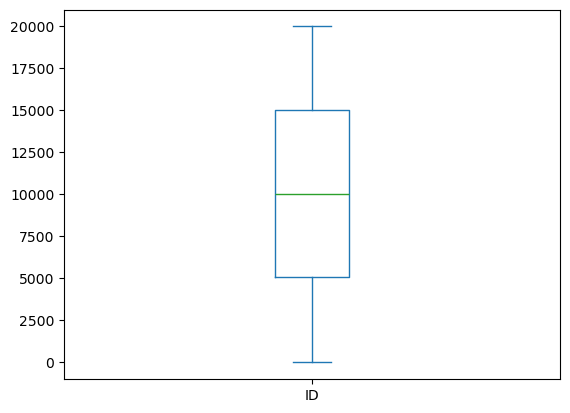

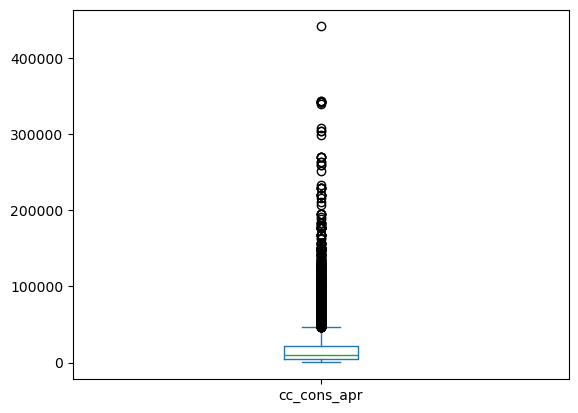

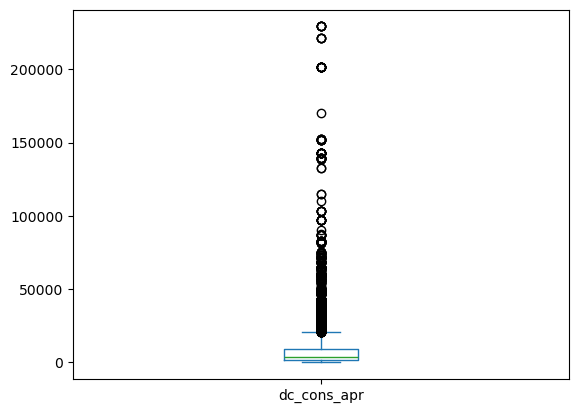

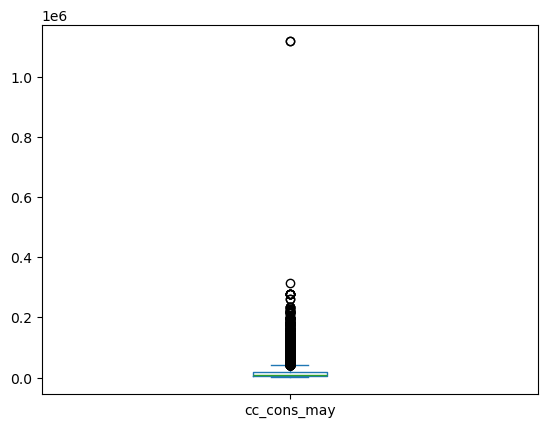

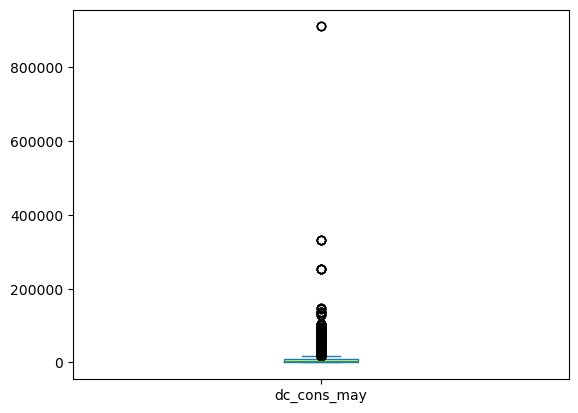

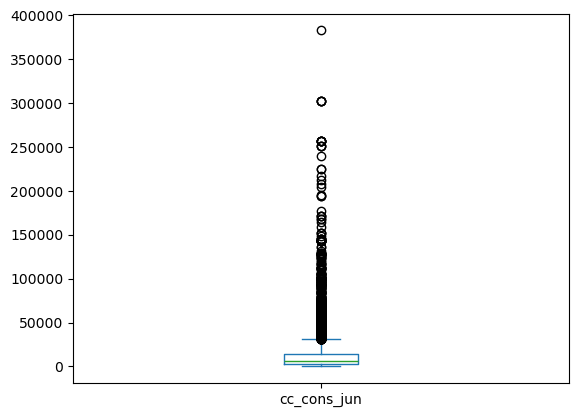

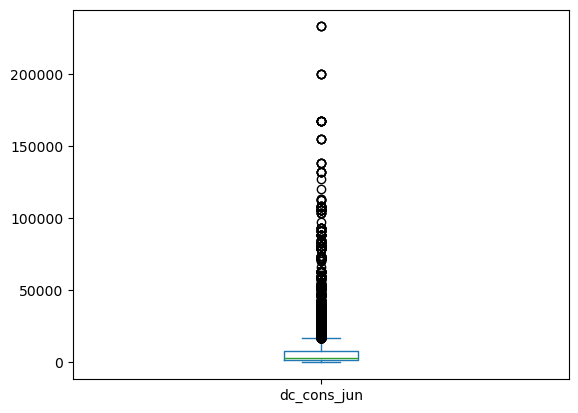

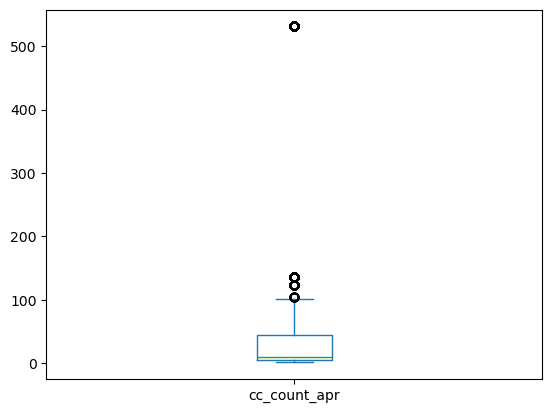

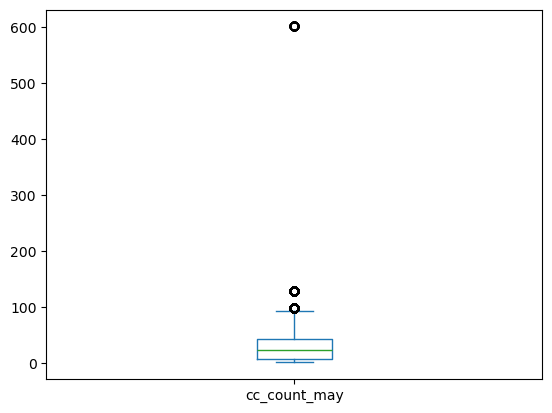

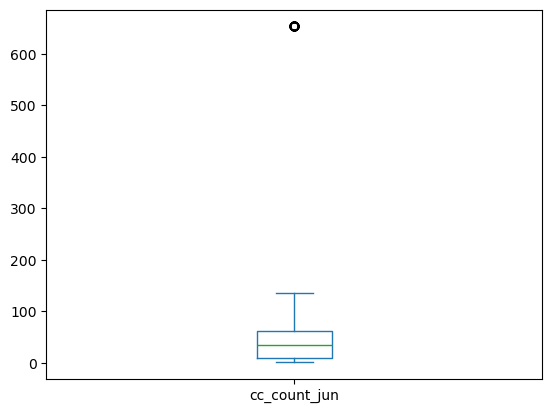

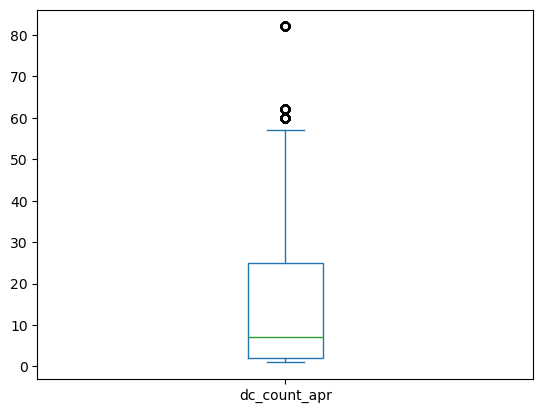

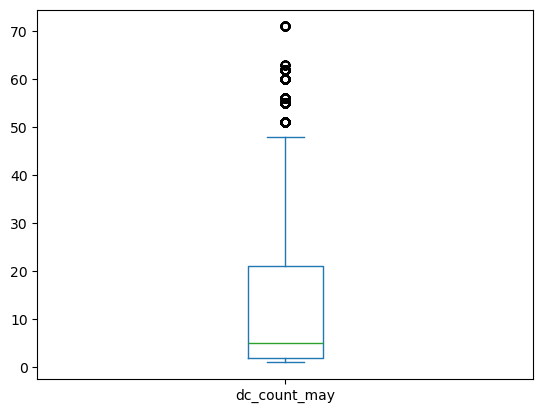

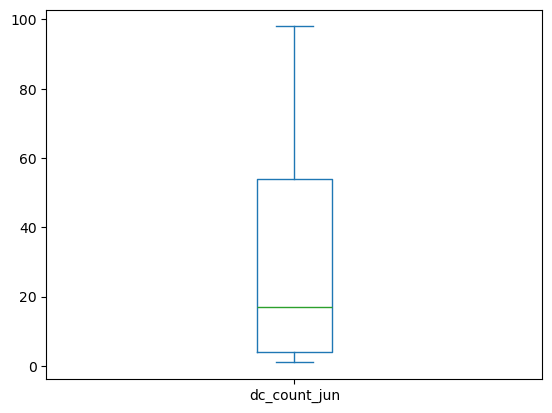

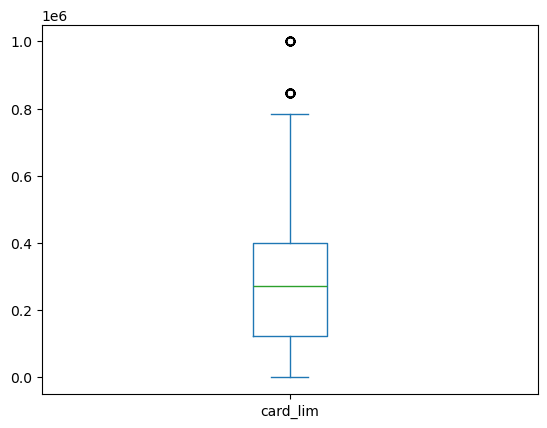

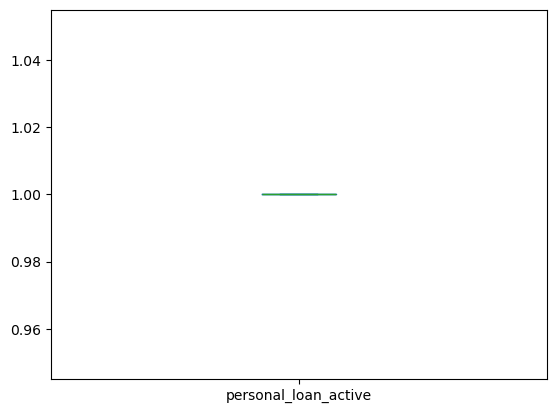

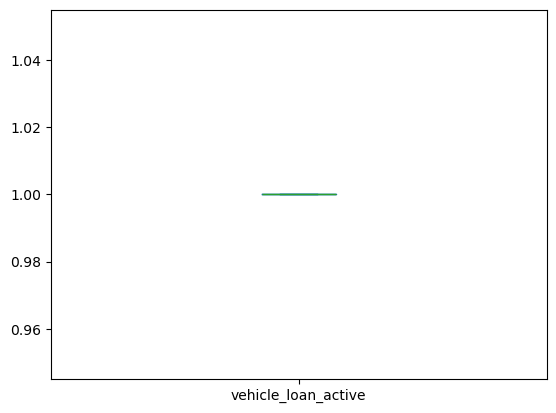

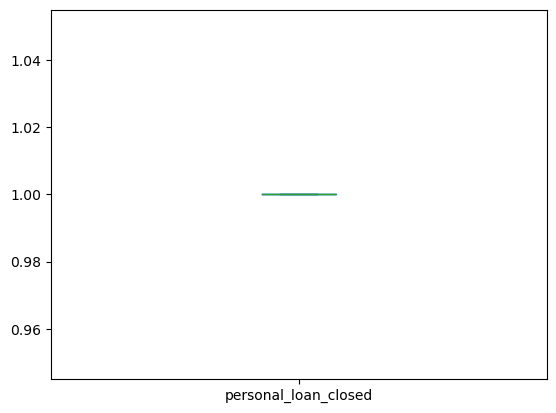

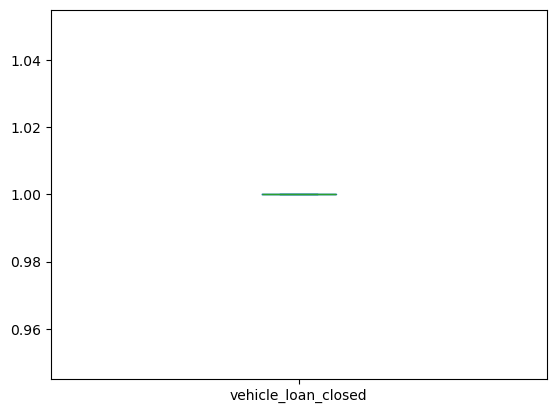

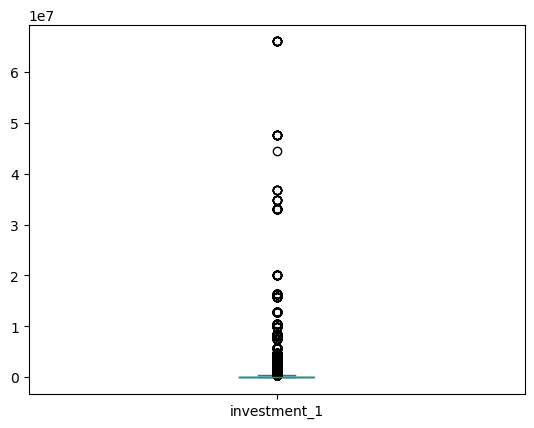

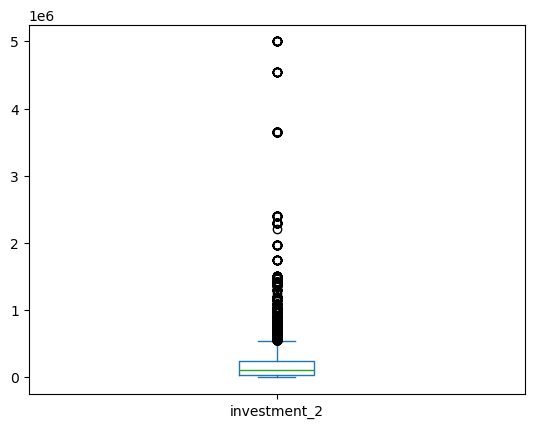

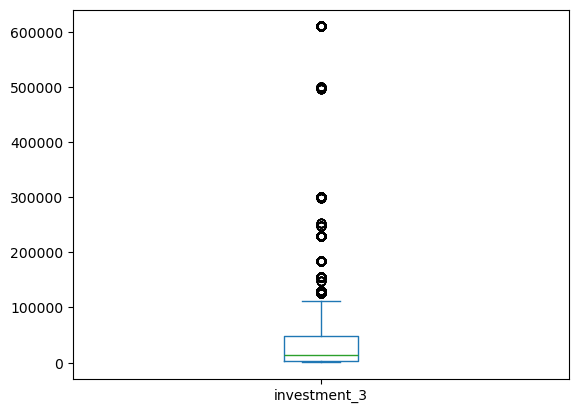

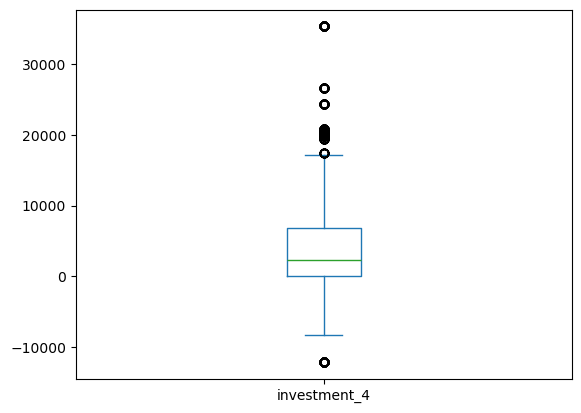

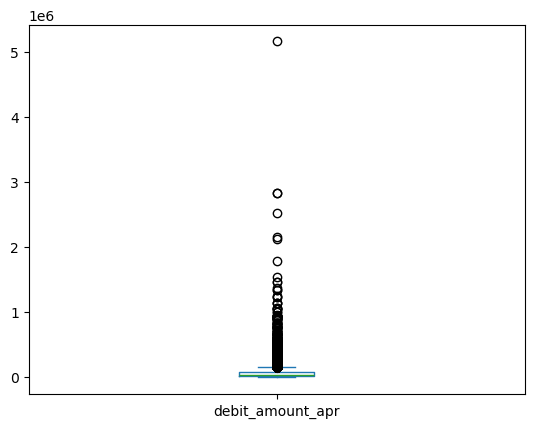

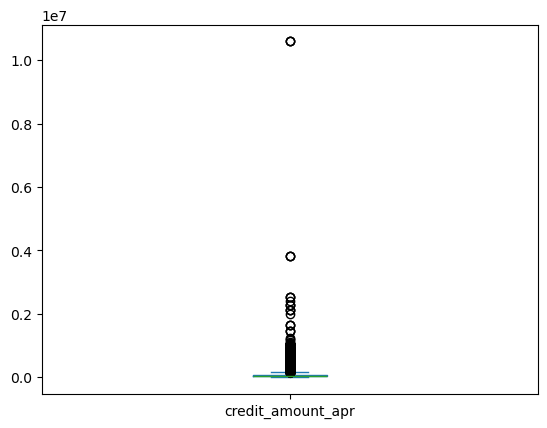

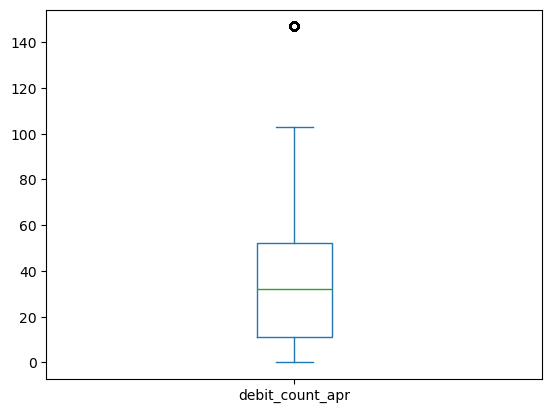

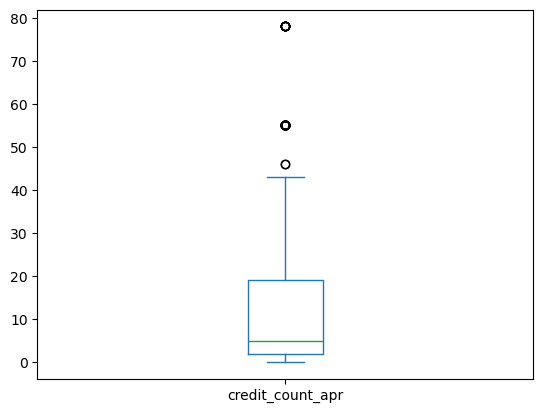

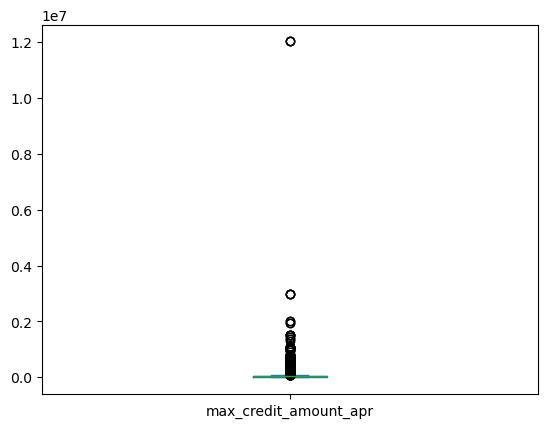

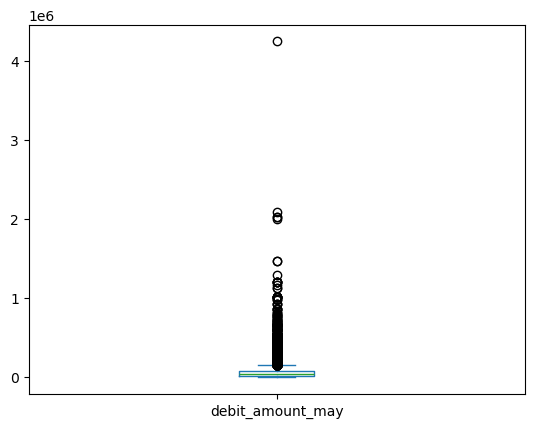

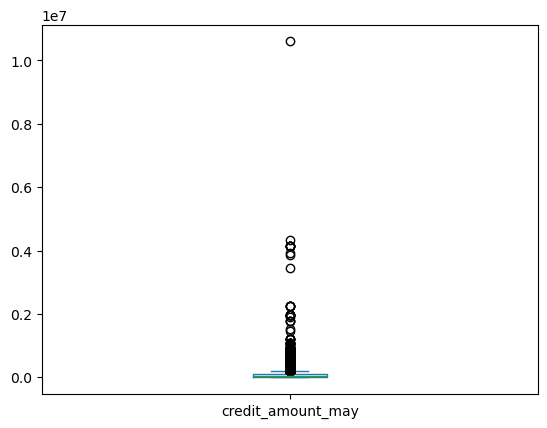

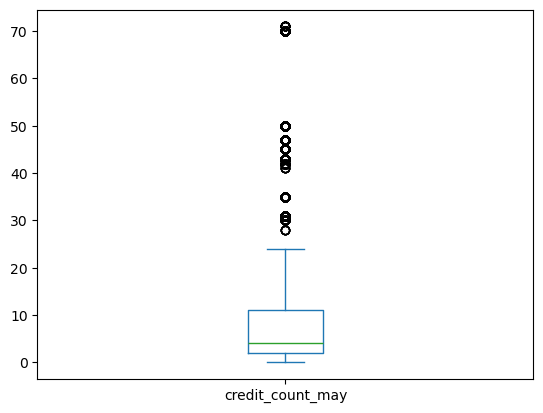

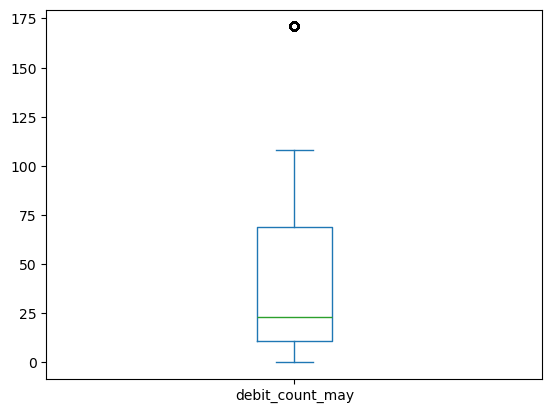

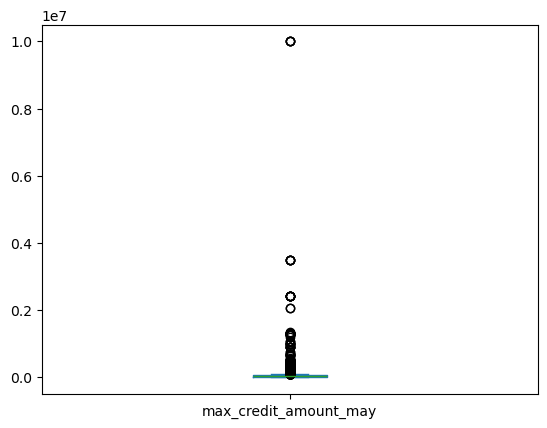

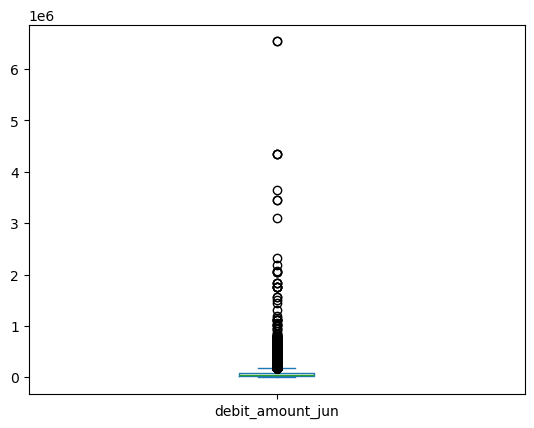

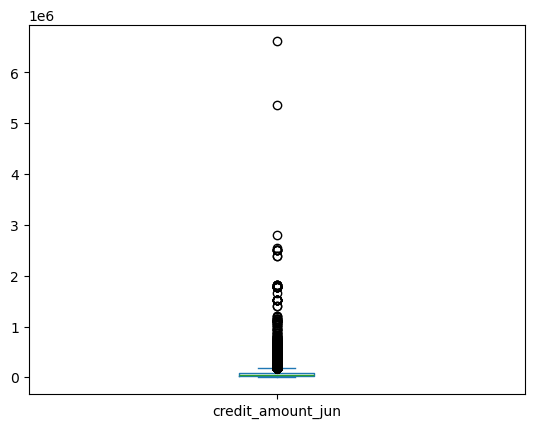

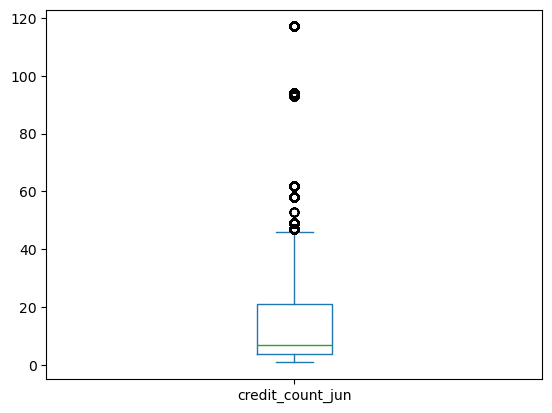

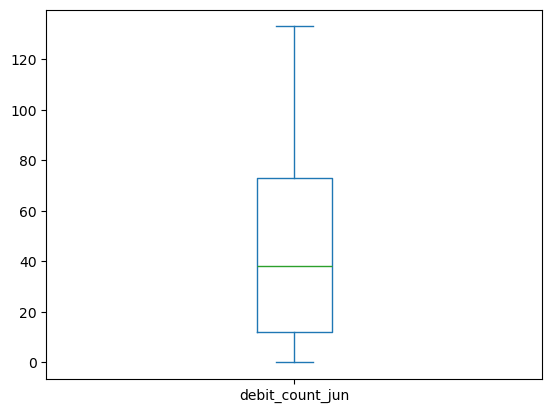

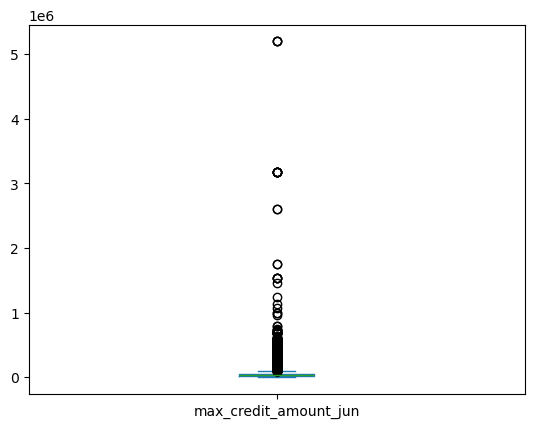

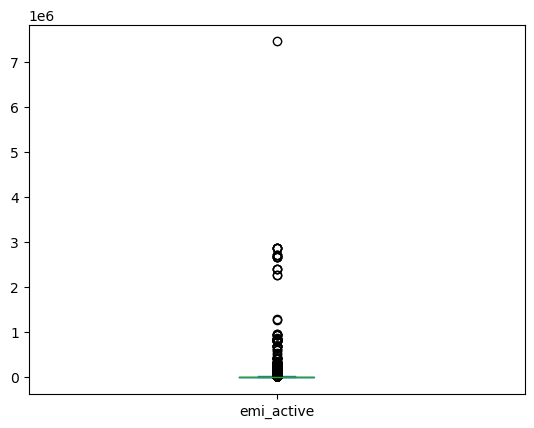

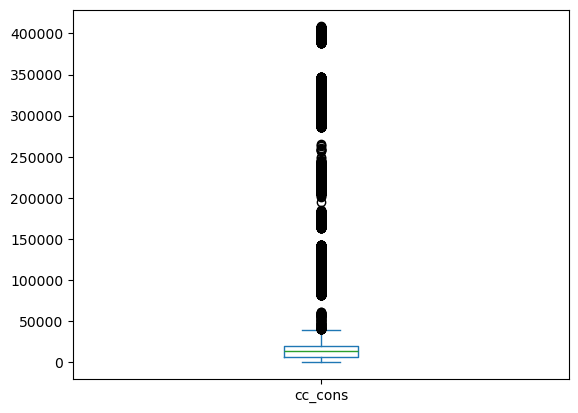

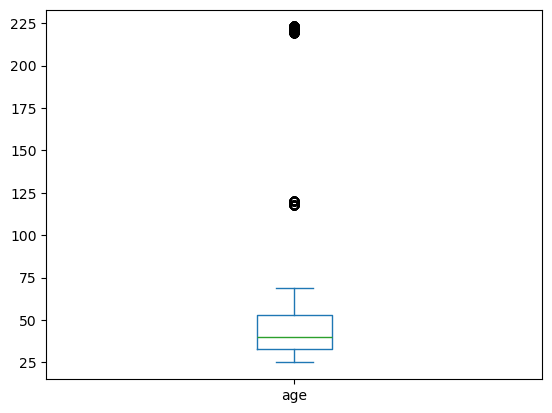

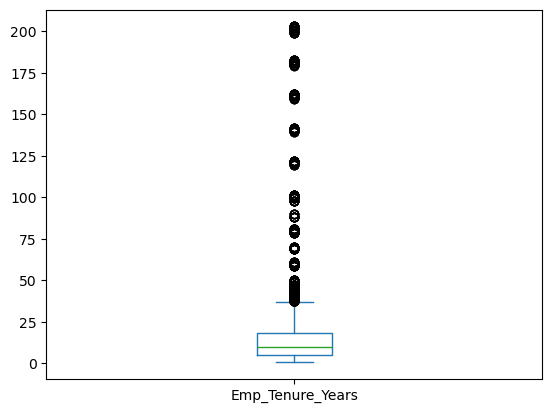

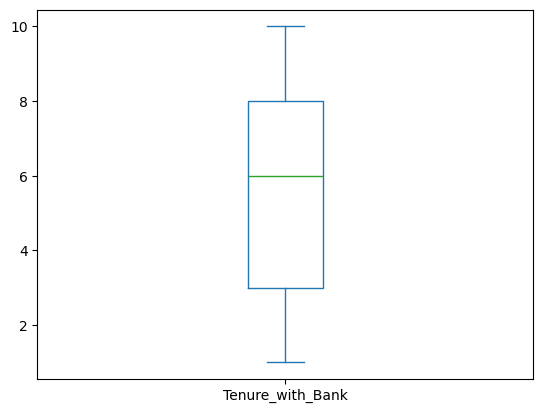

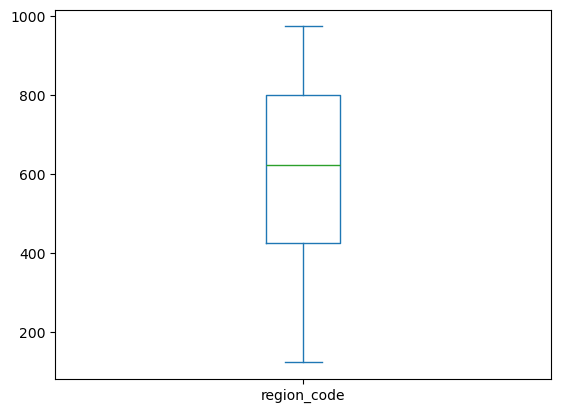

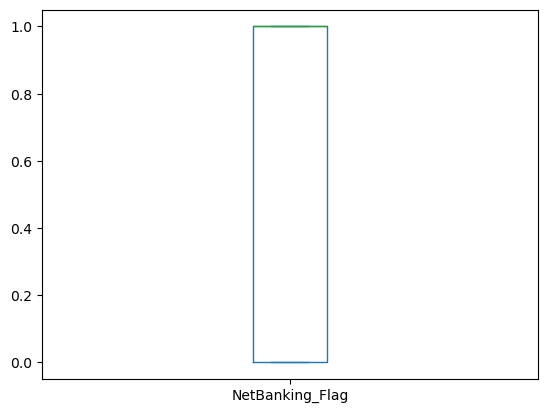

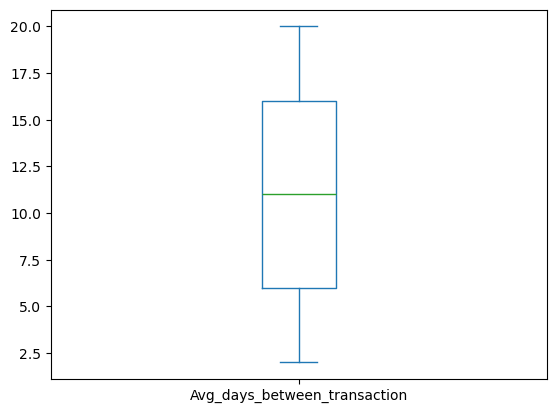

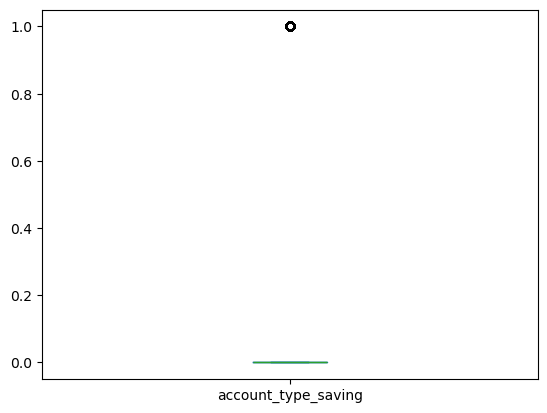

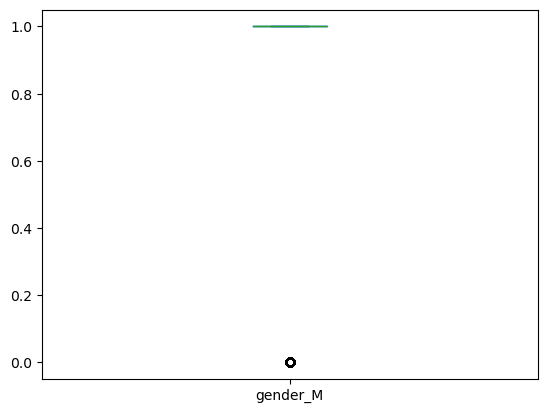

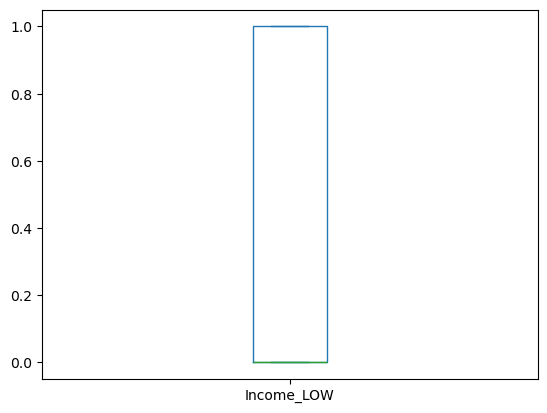

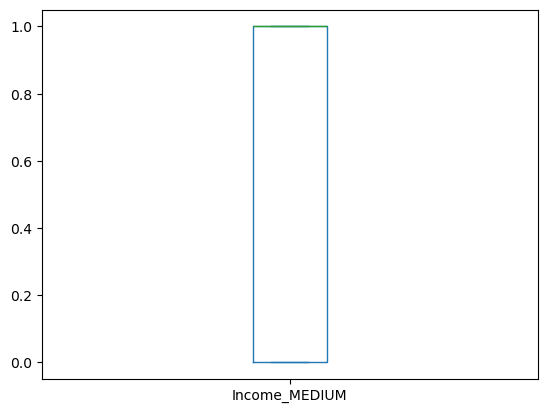

In [24]:
# check the outliers through visualization 

for column in train.columns:
    train[column].plot(kind='box')
    plt.show()

In [25]:
train = train.apply(lambda x:x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

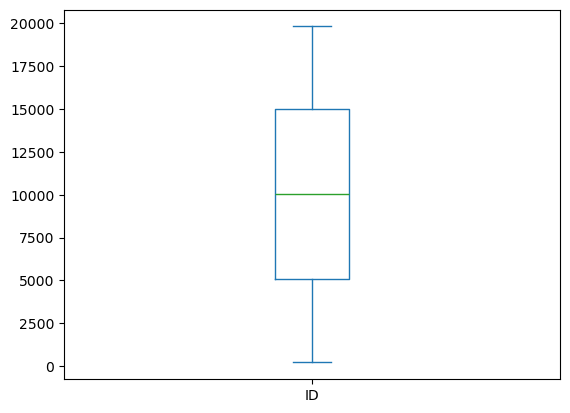

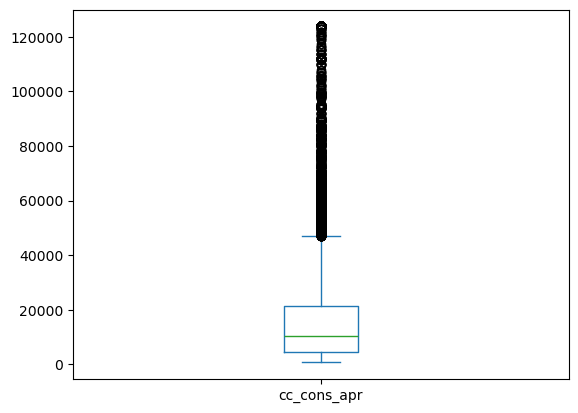

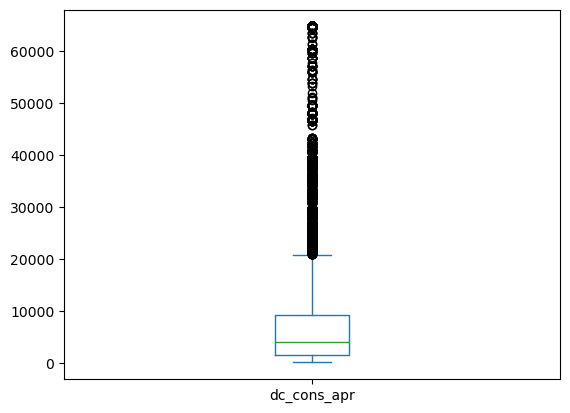

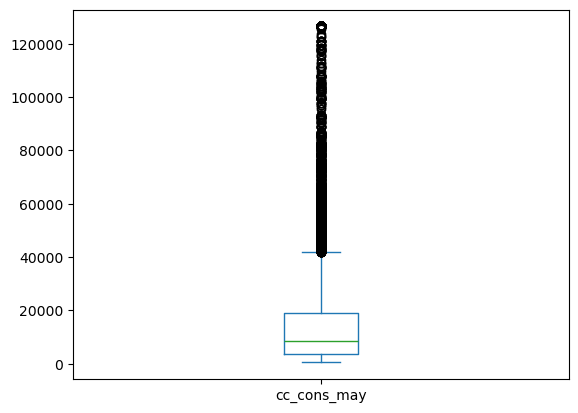

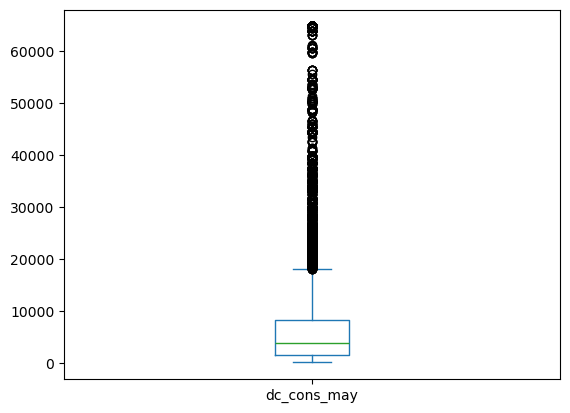

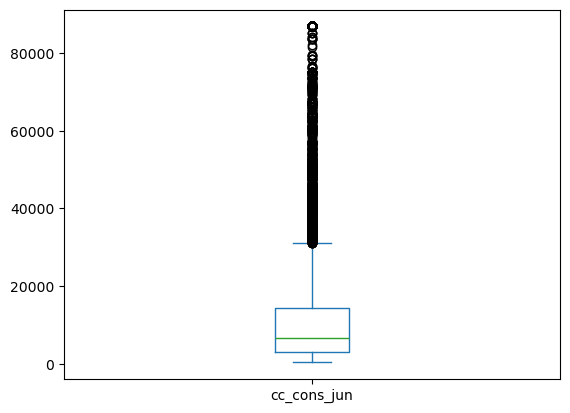

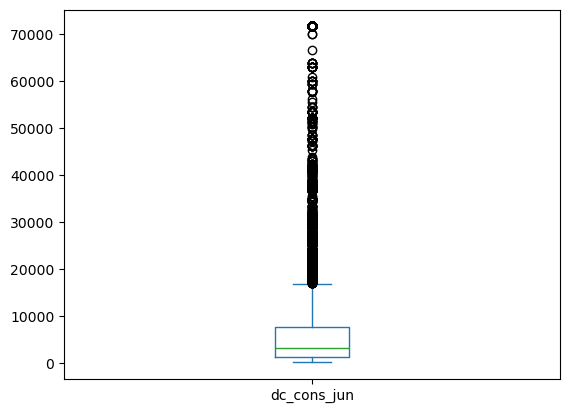

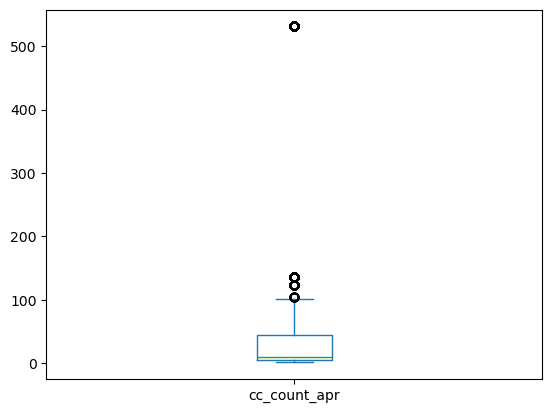

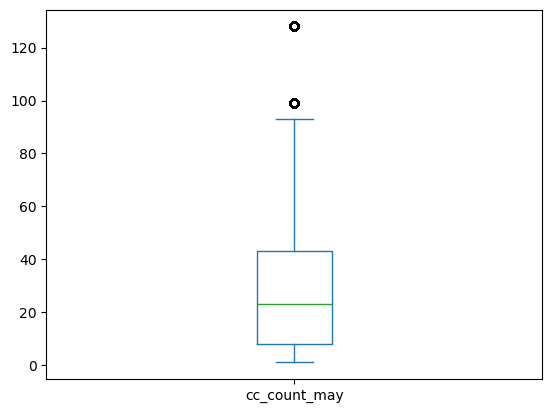

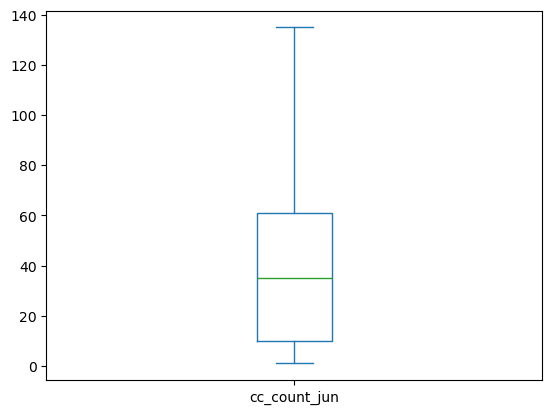

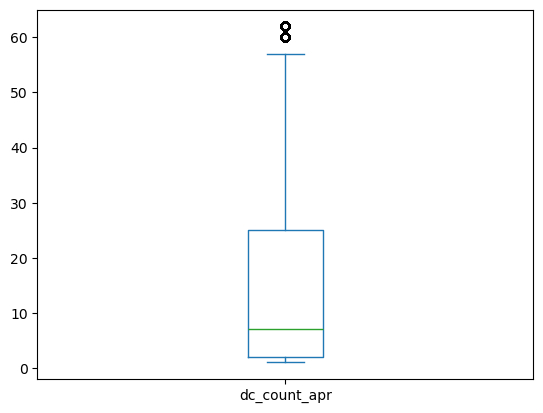

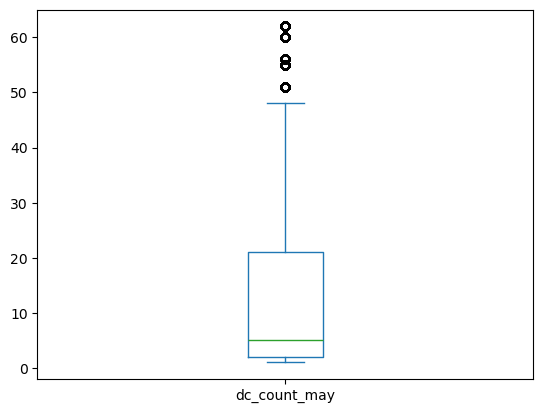

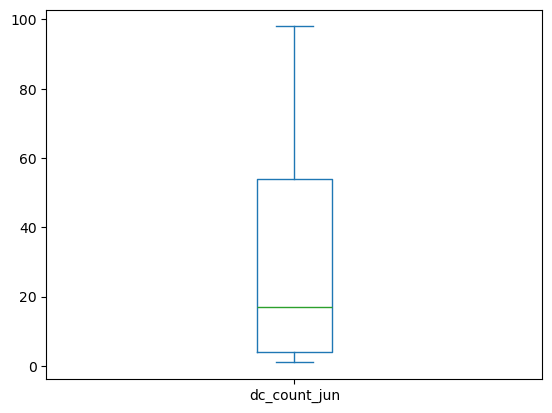

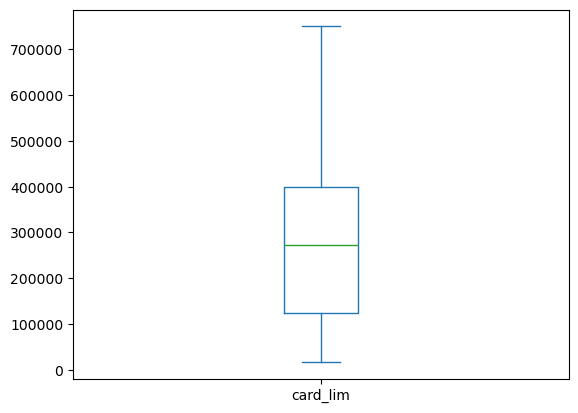

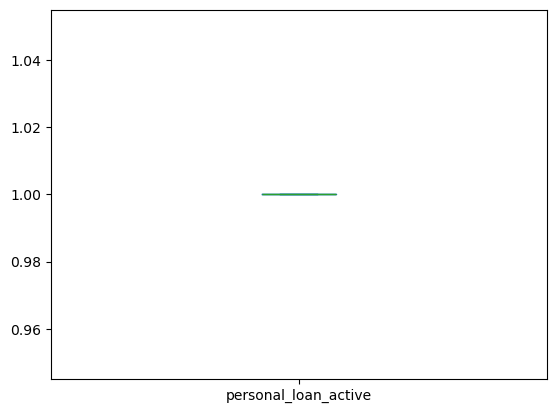

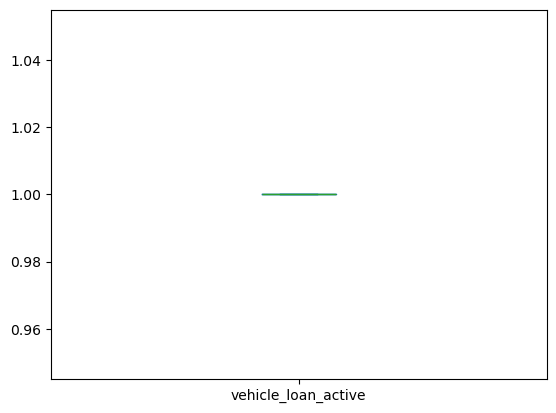

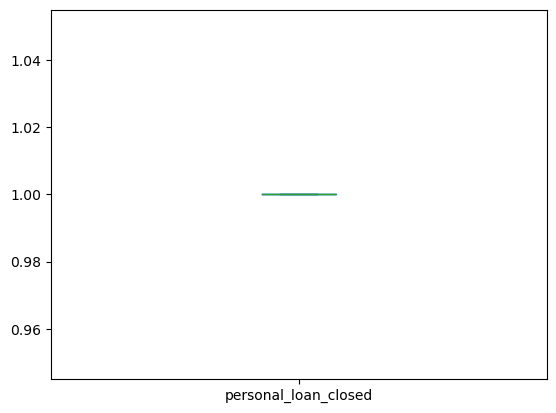

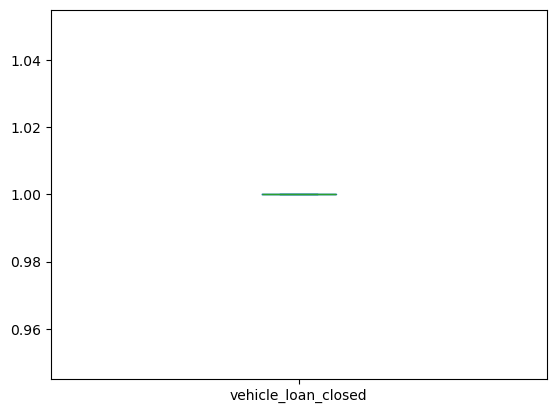

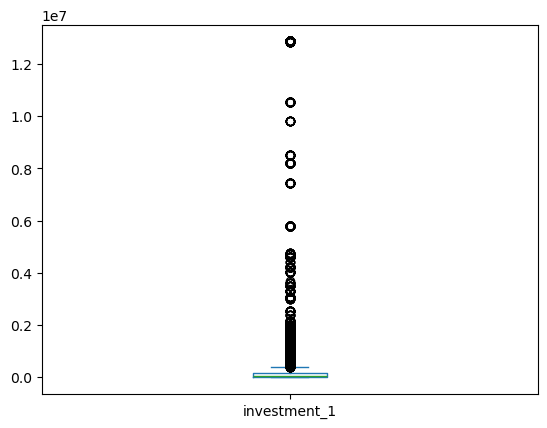

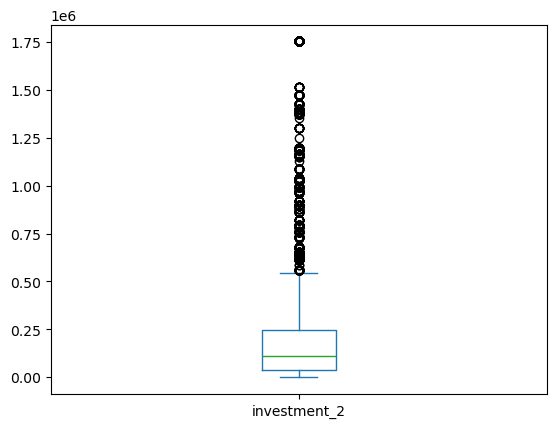

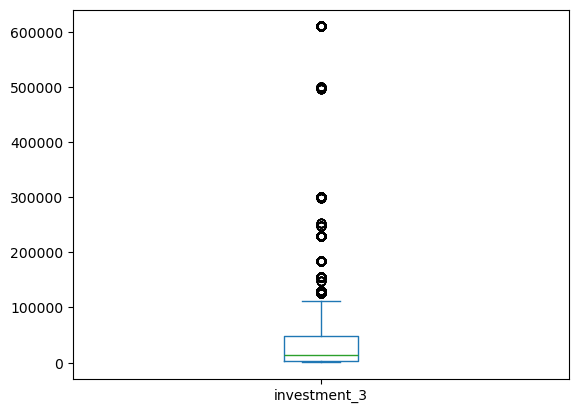

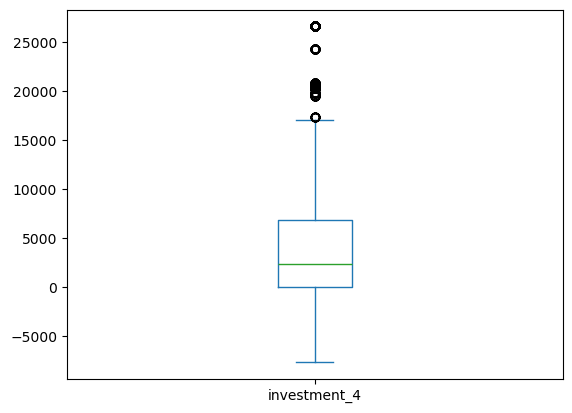

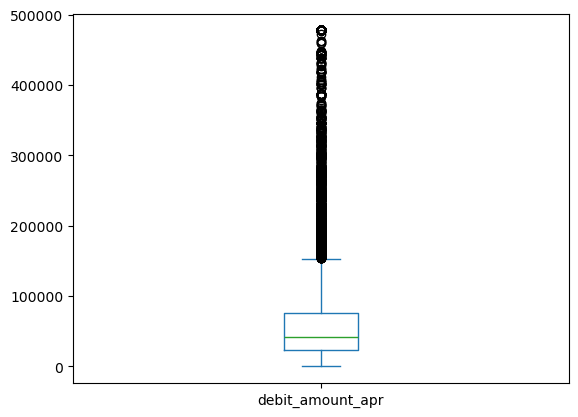

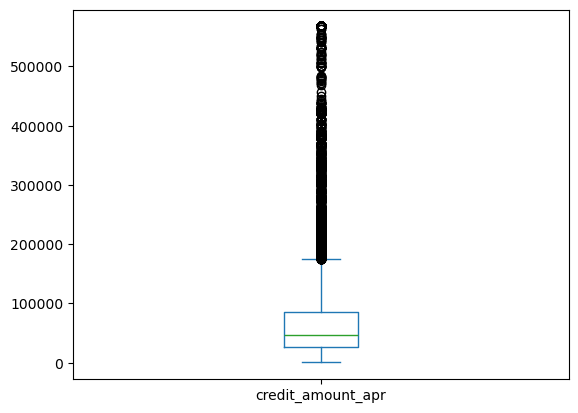

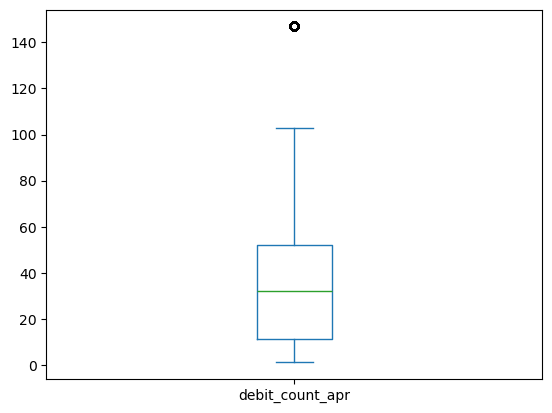

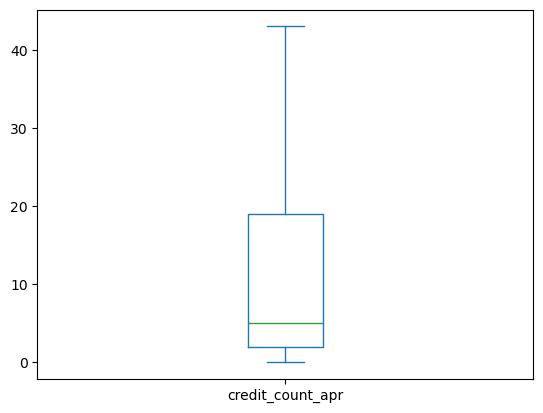

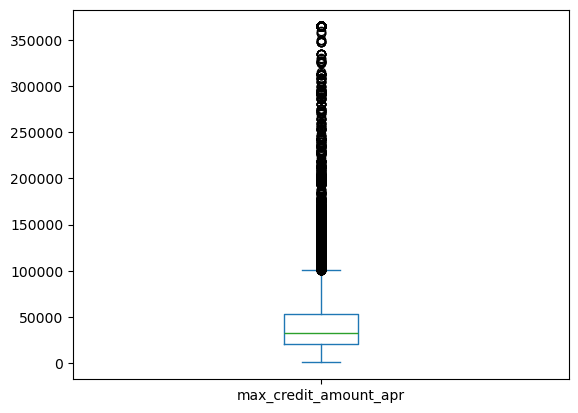

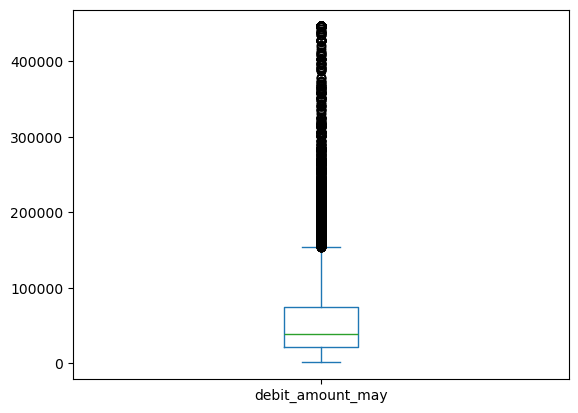

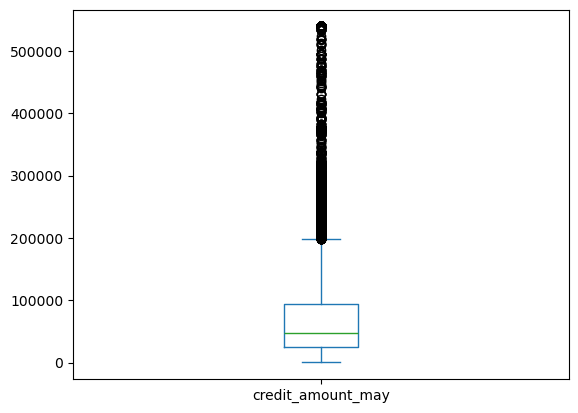

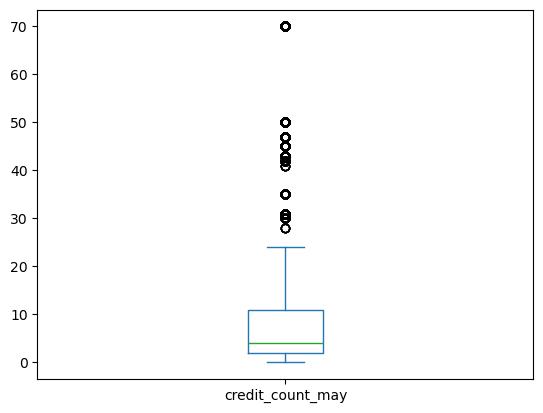

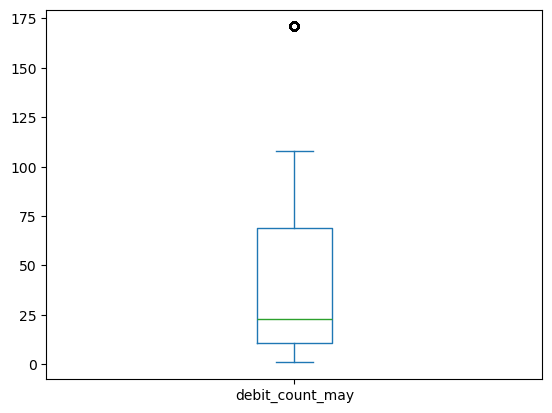

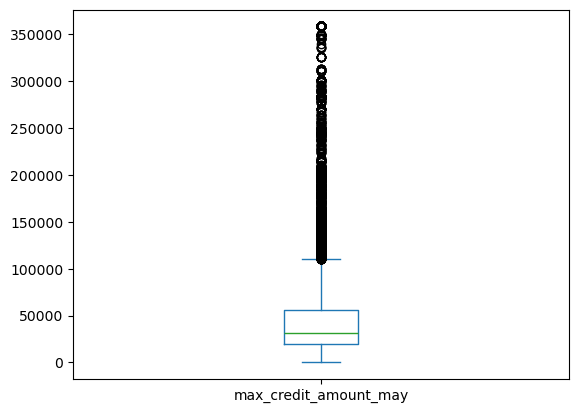

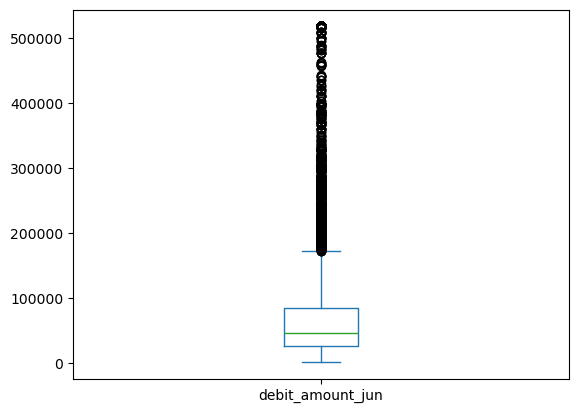

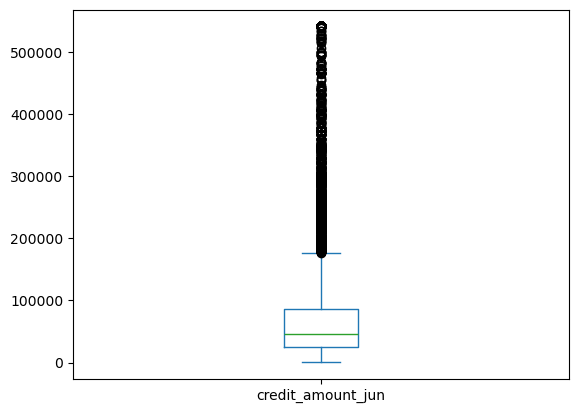

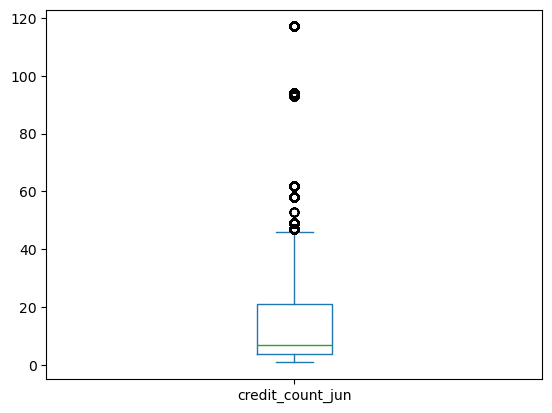

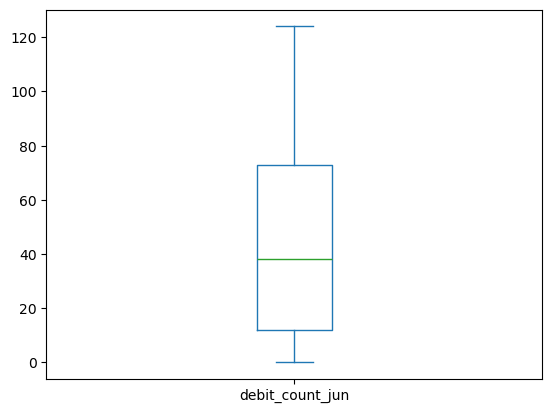

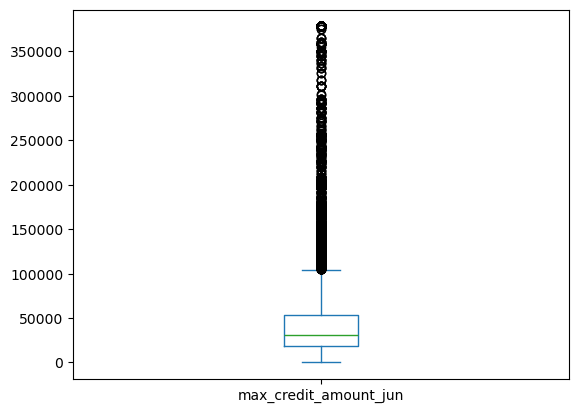

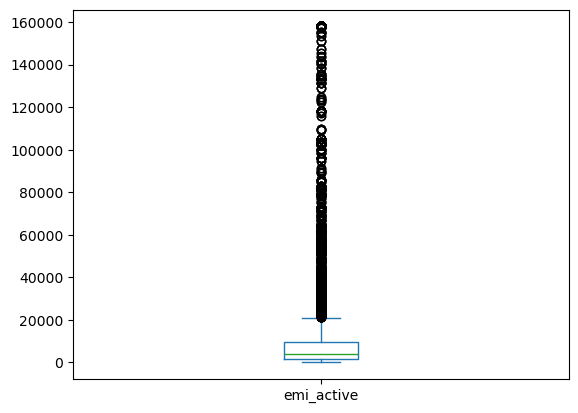

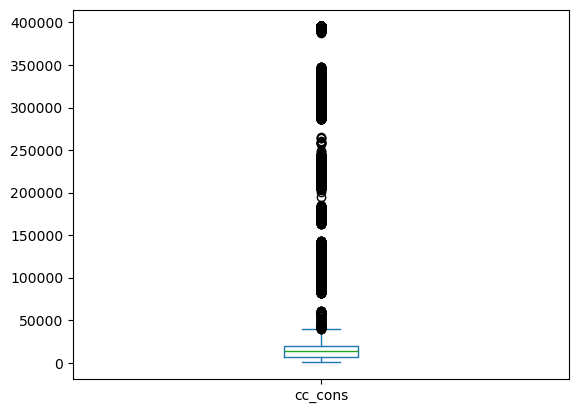

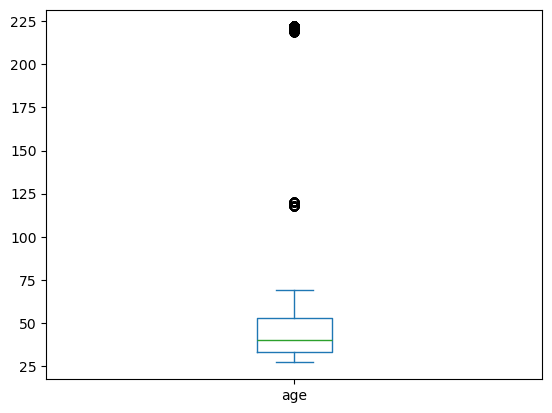

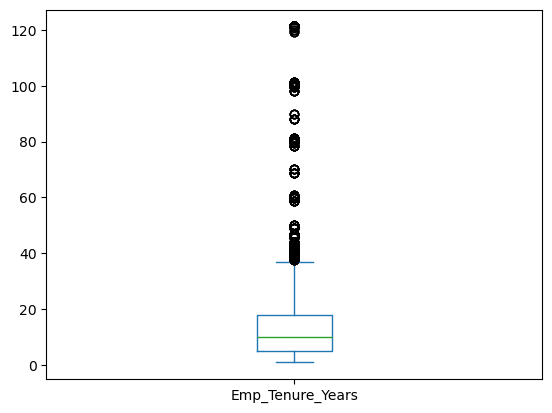

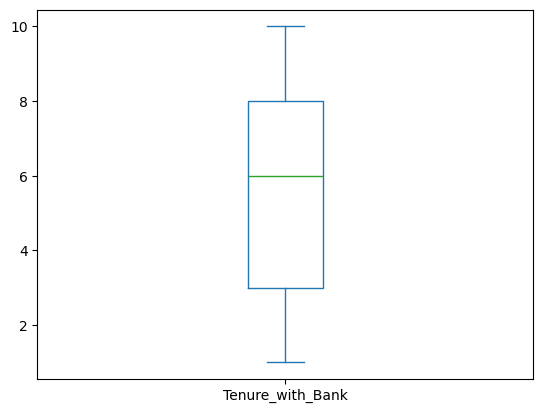

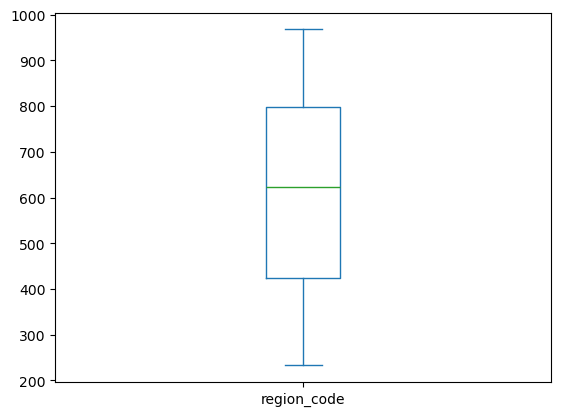

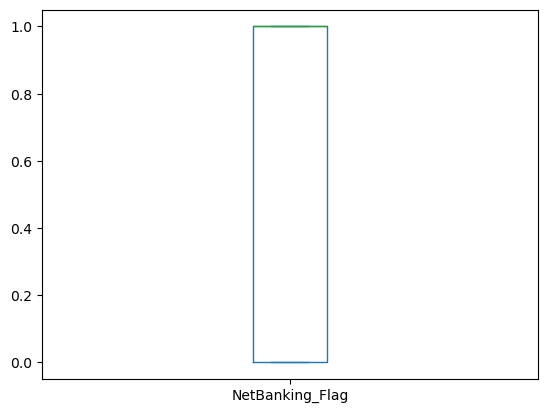

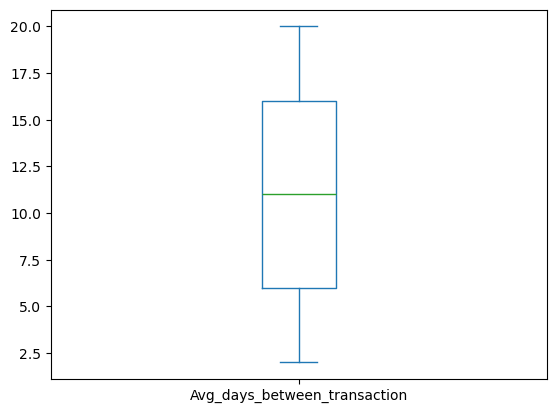

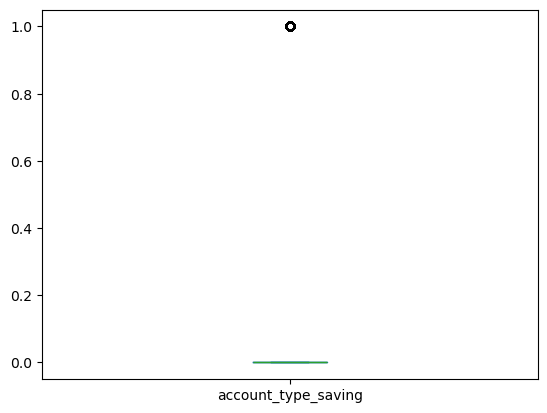

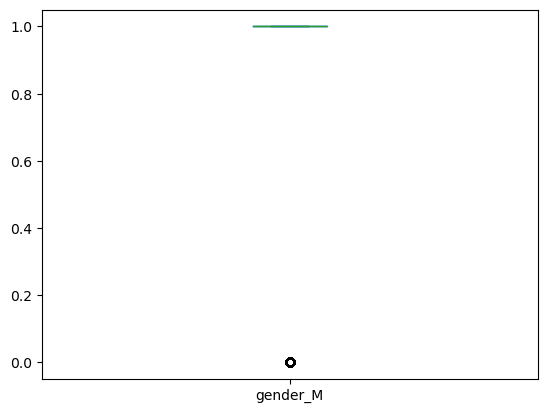

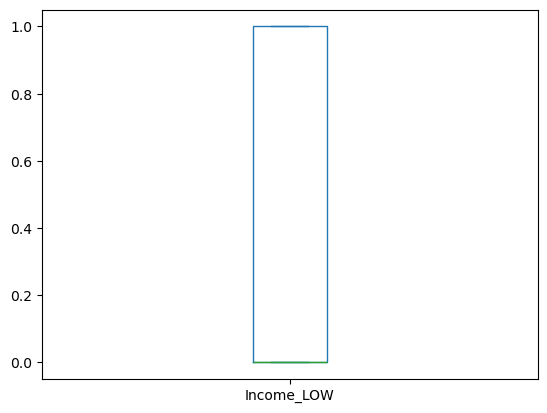

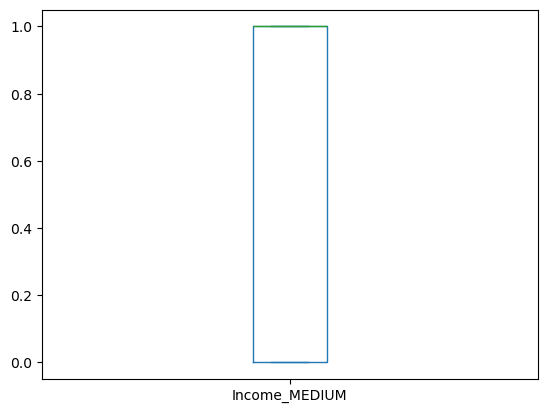

In [26]:
for column in train.columns:
    train[column].plot(kind='box')
    plt.show()

#### Checking linearity of the data

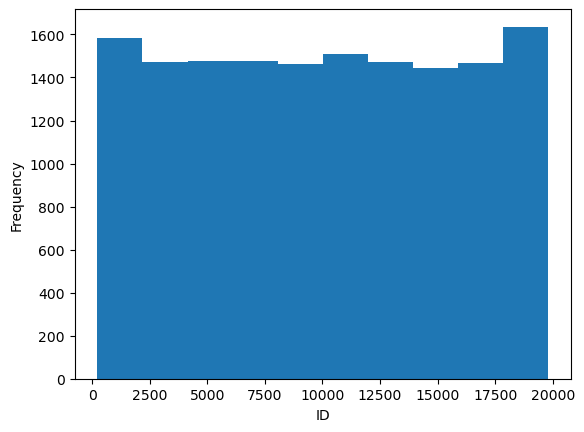

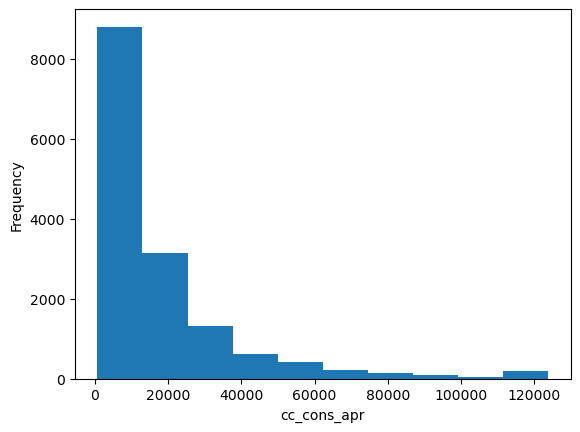

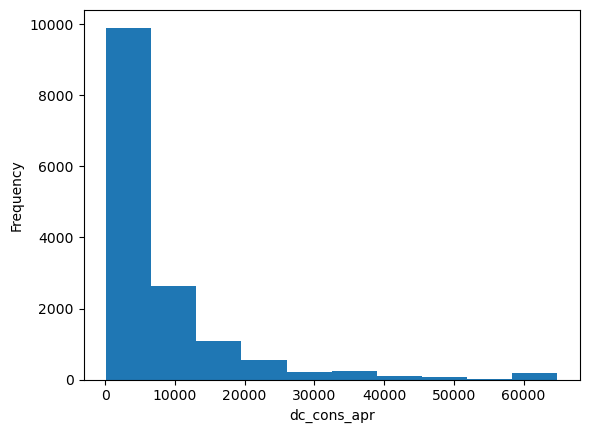

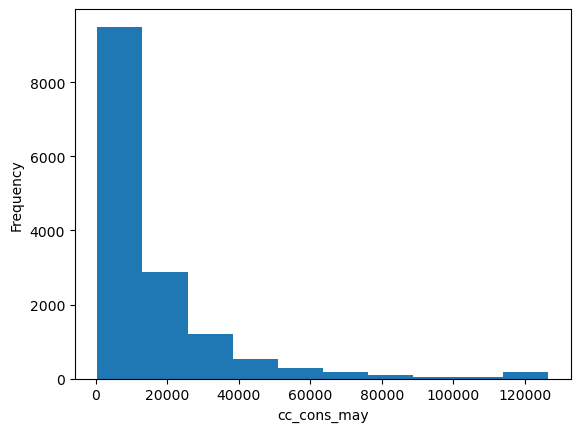

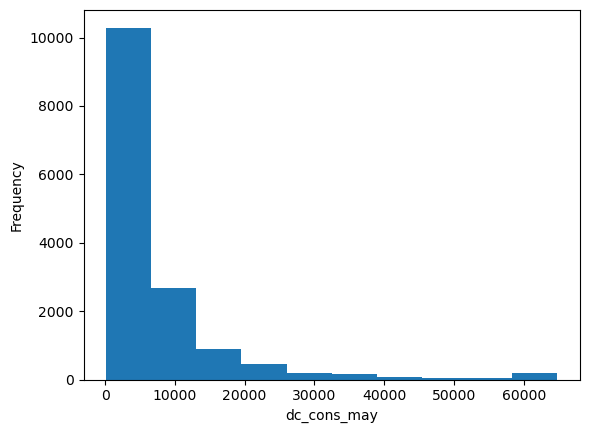

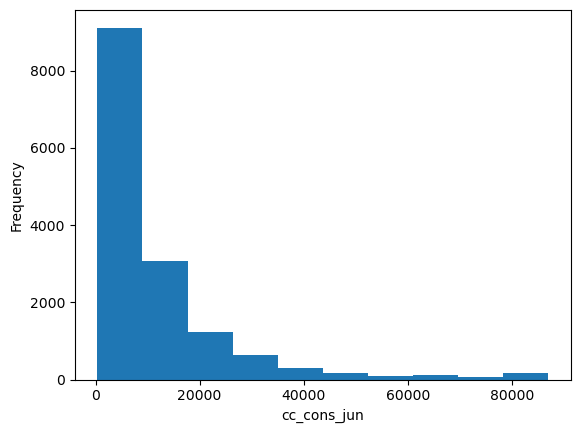

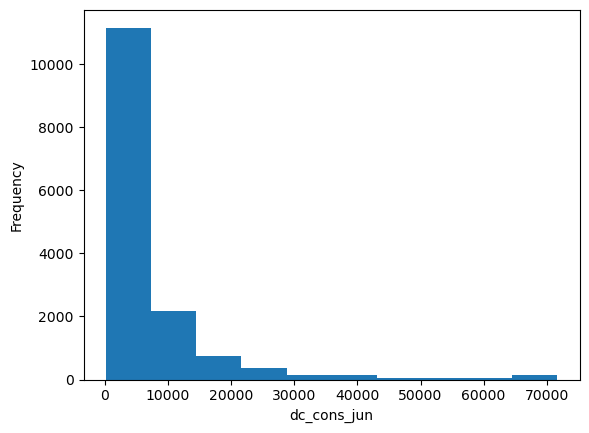

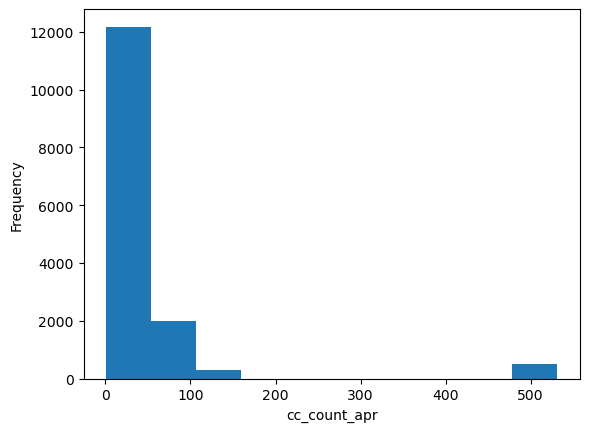

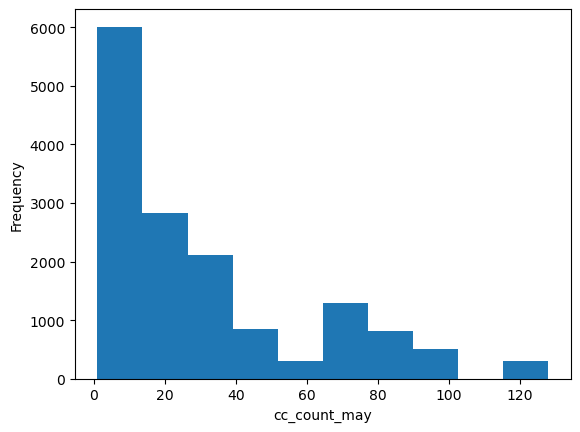

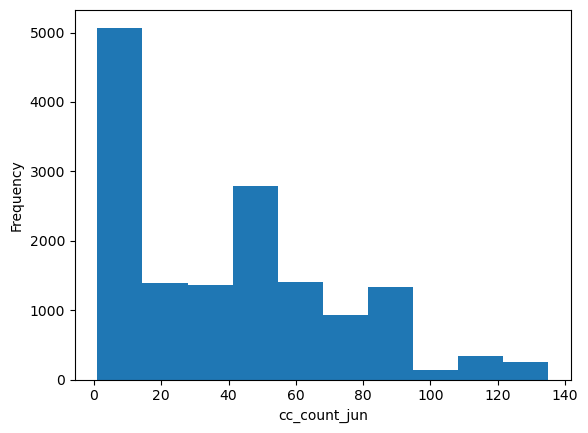

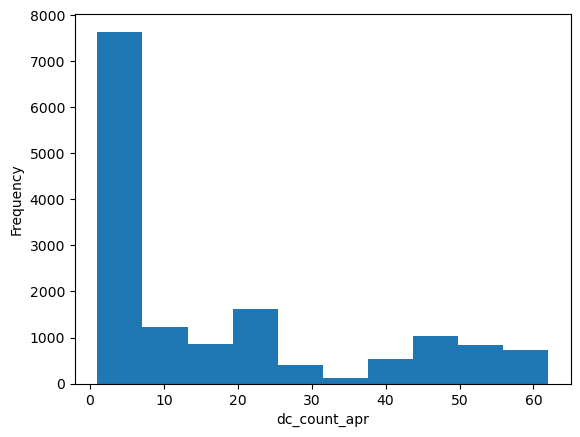

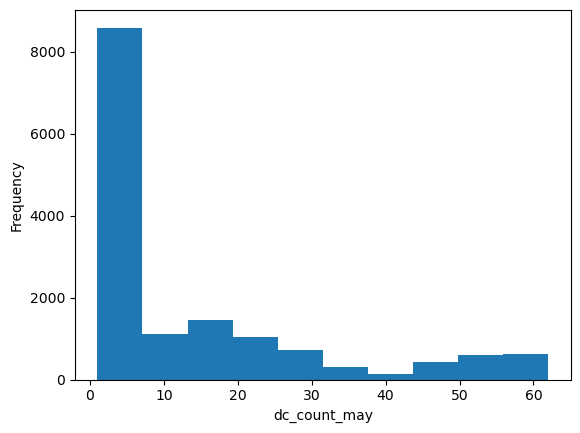

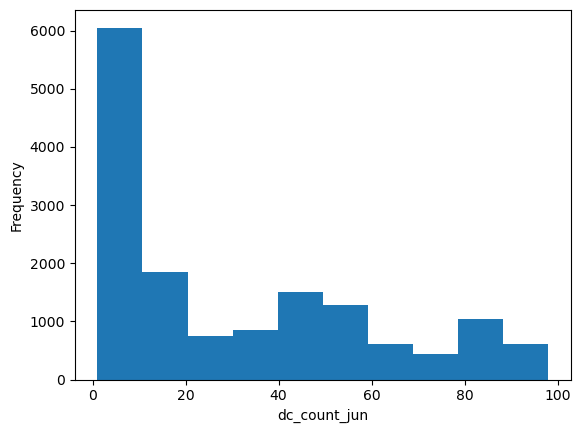

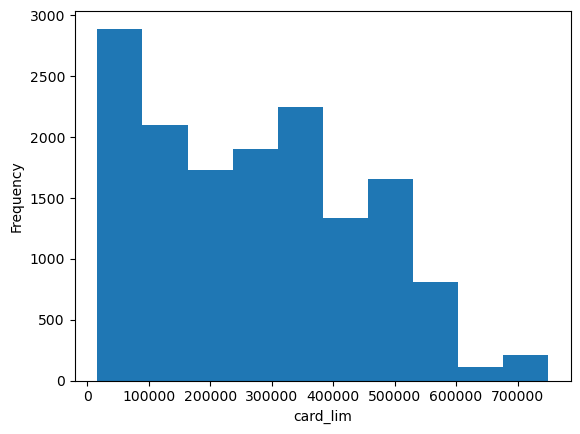

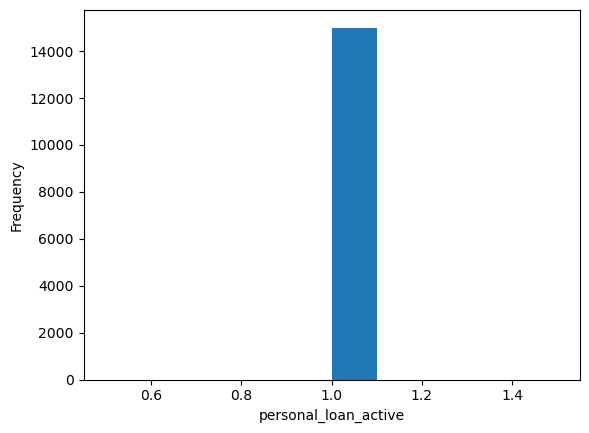

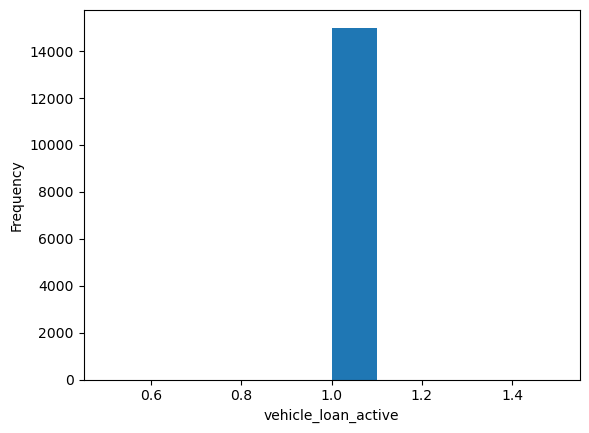

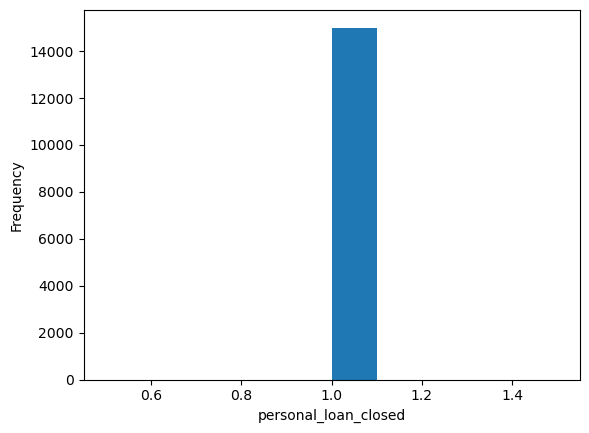

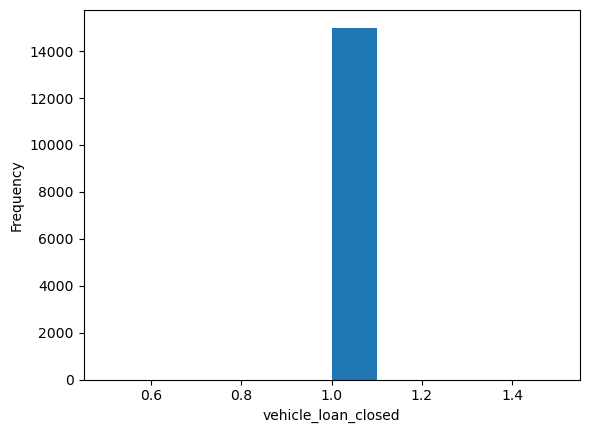

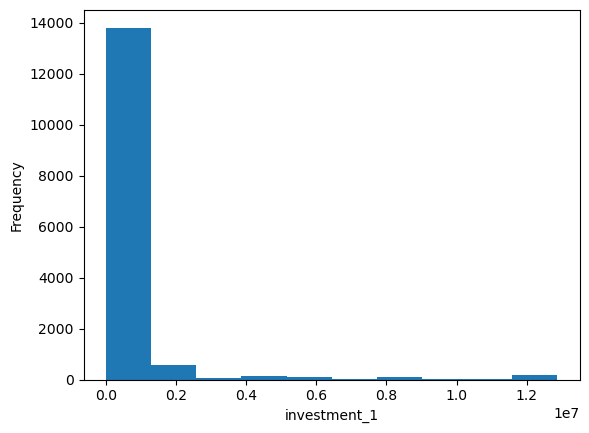

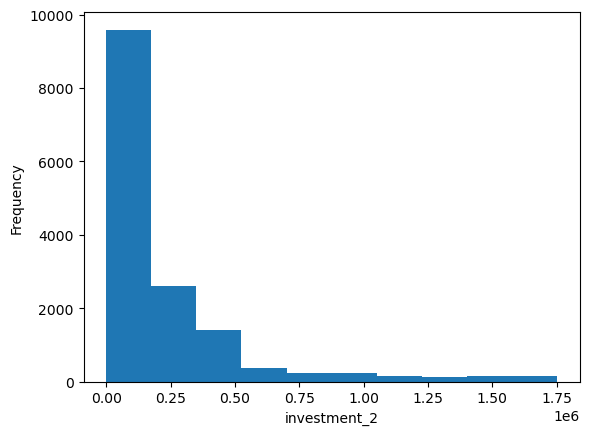

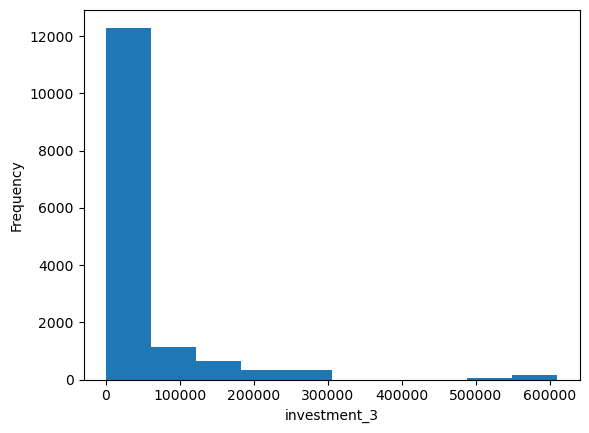

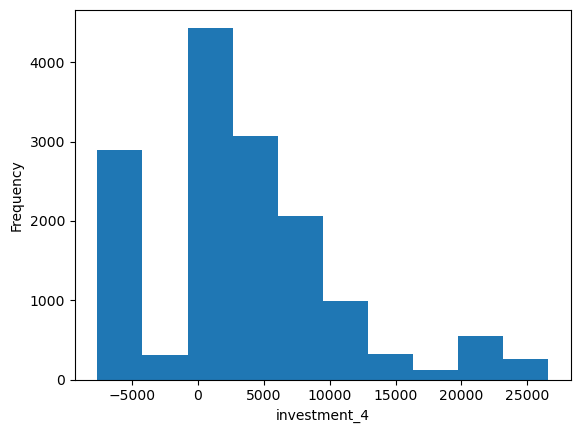

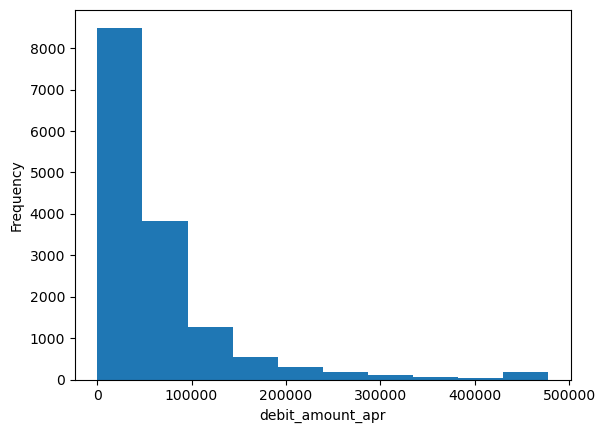

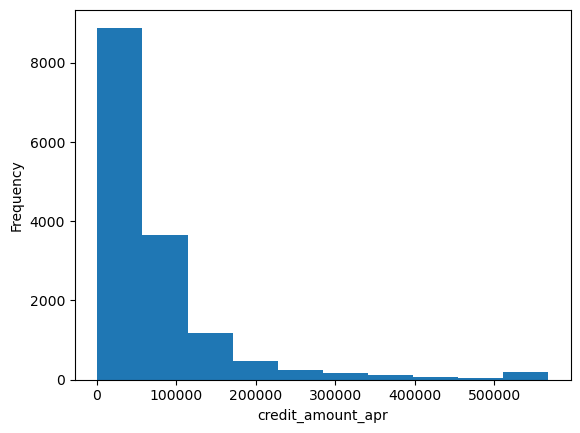

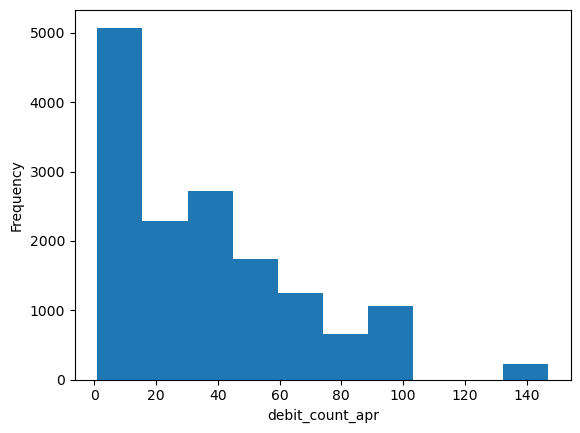

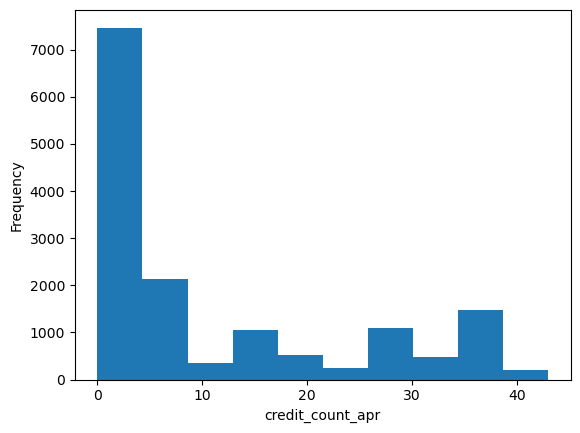

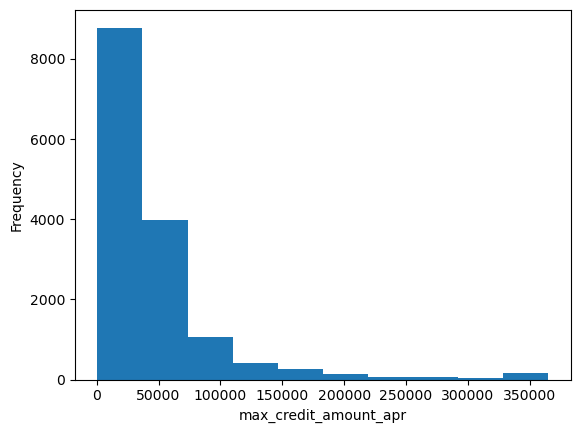

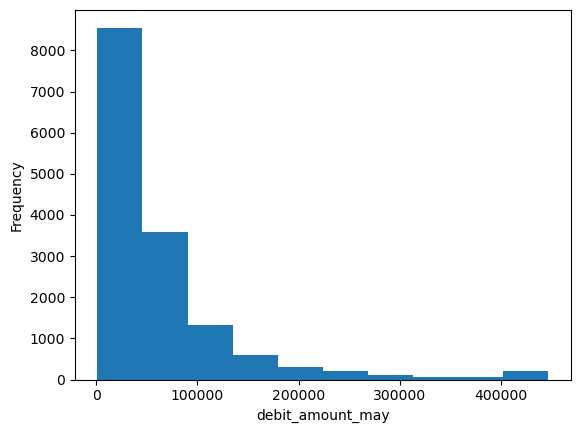

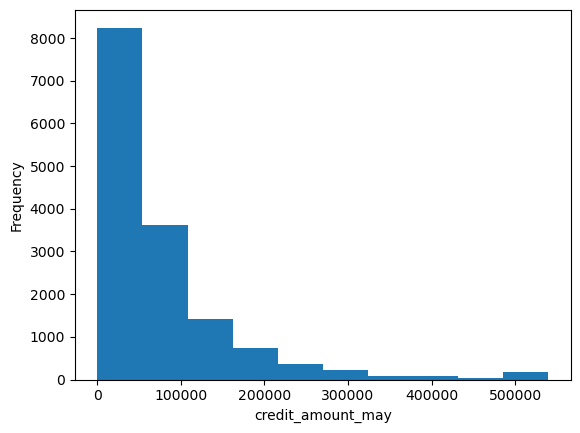

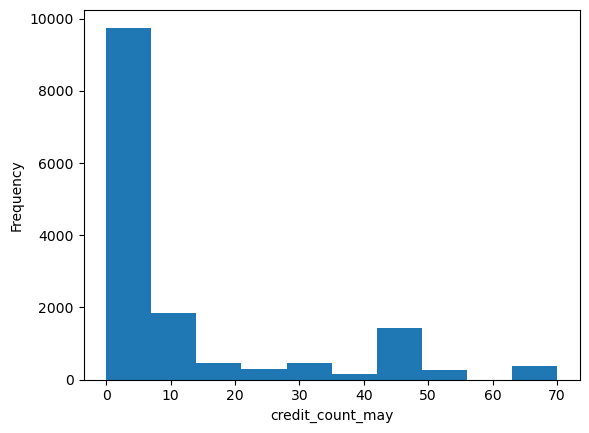

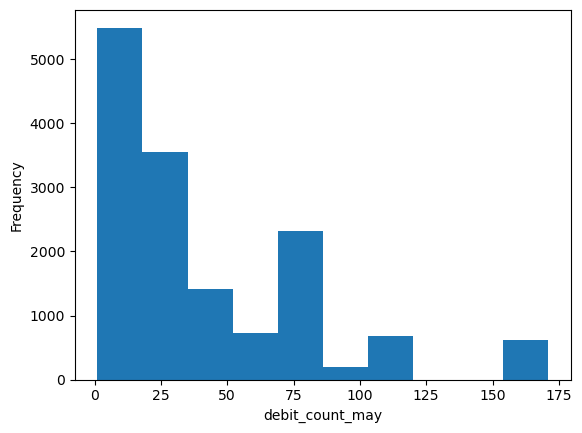

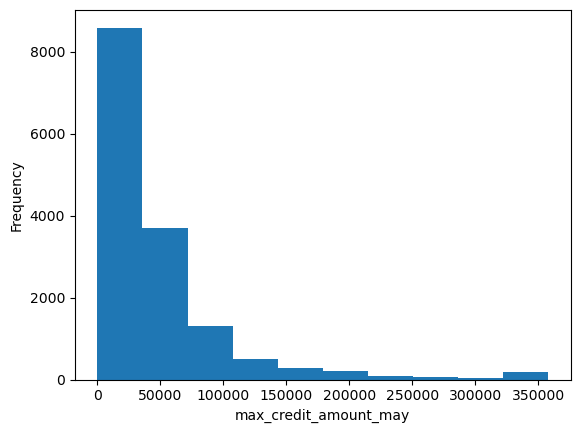

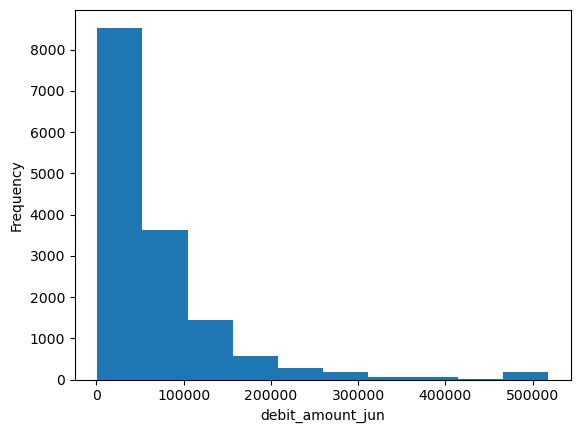

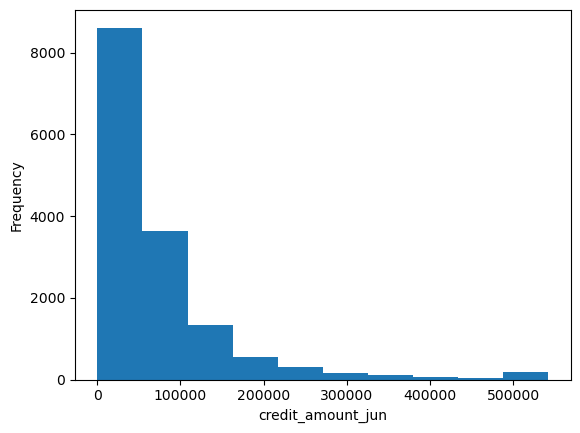

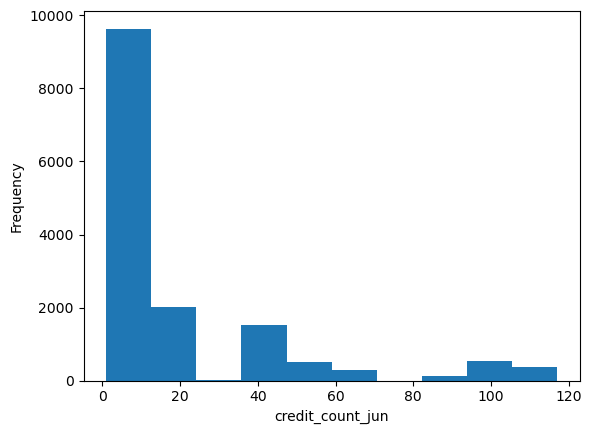

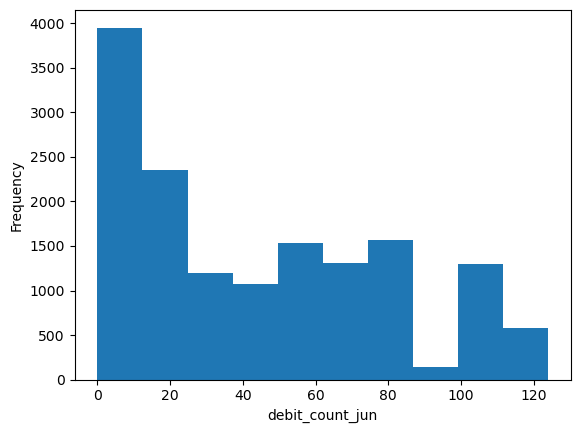

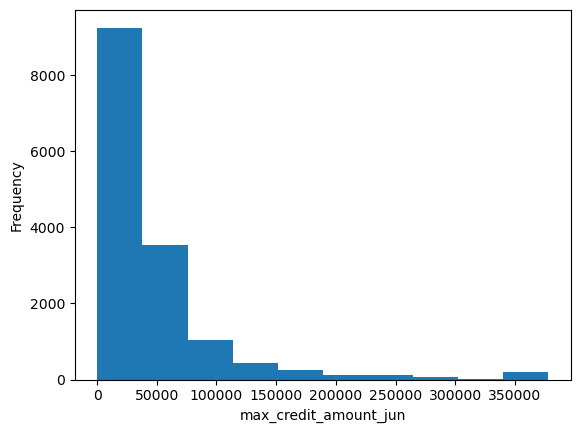

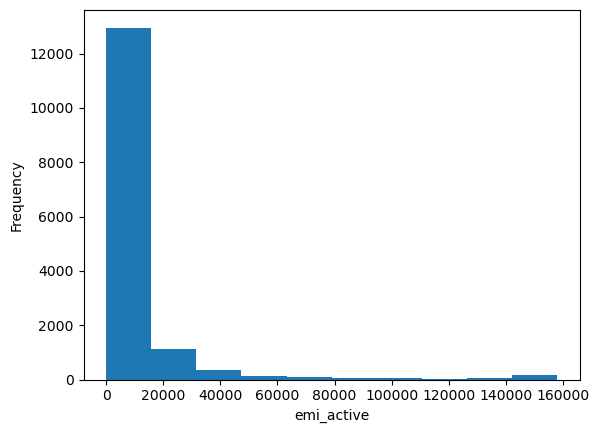

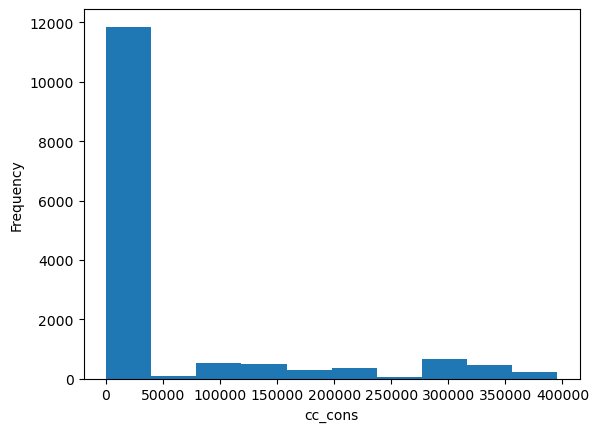

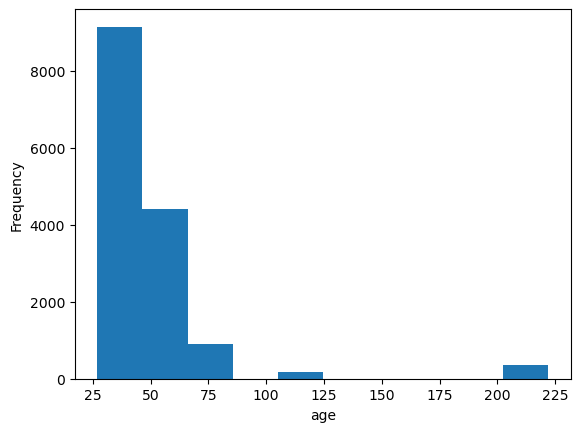

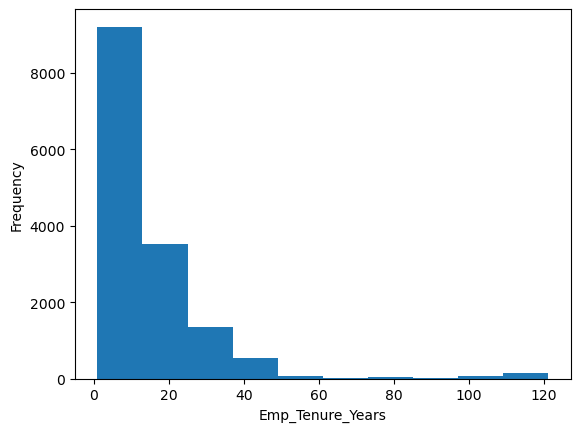

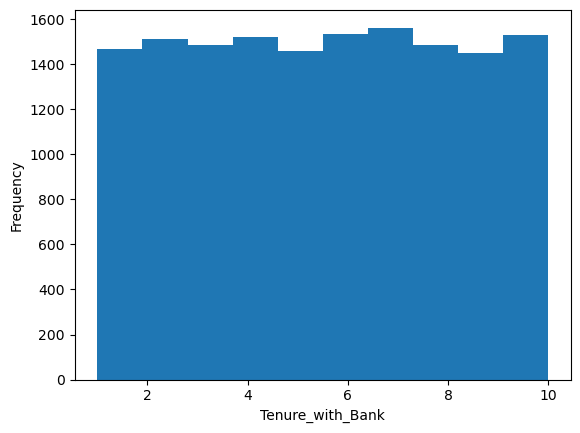

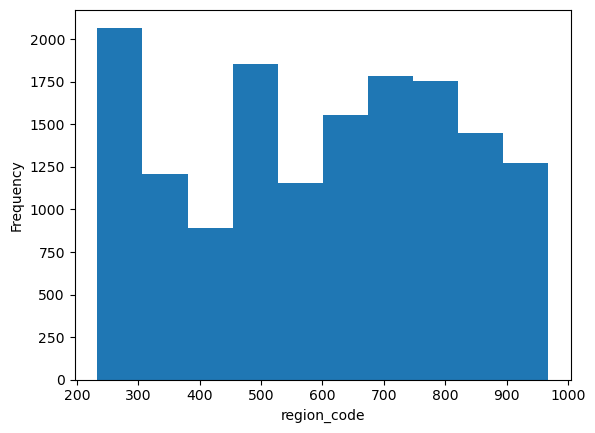

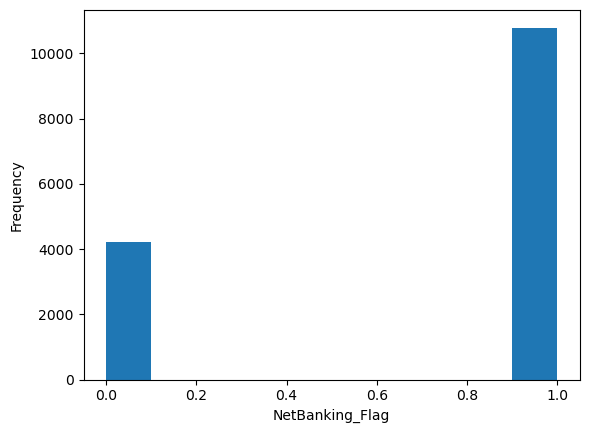

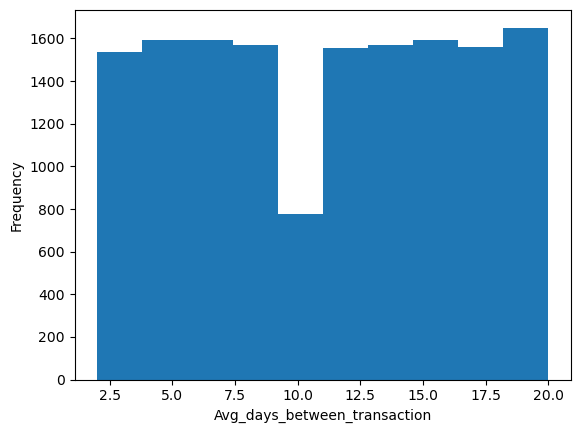

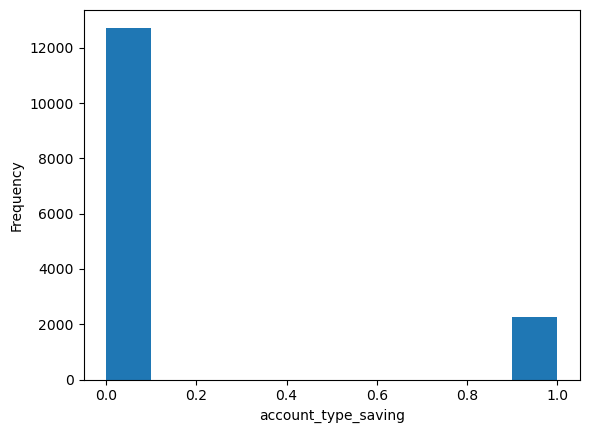

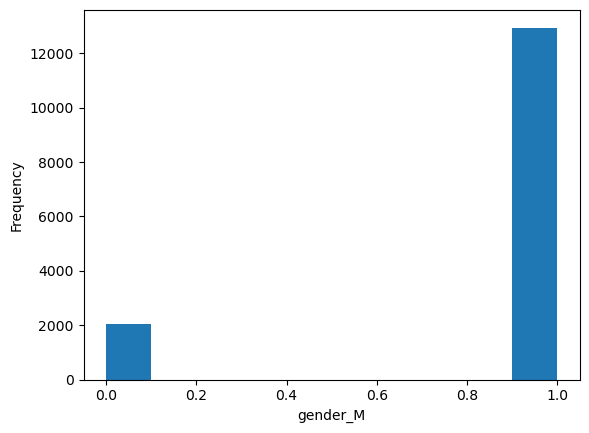

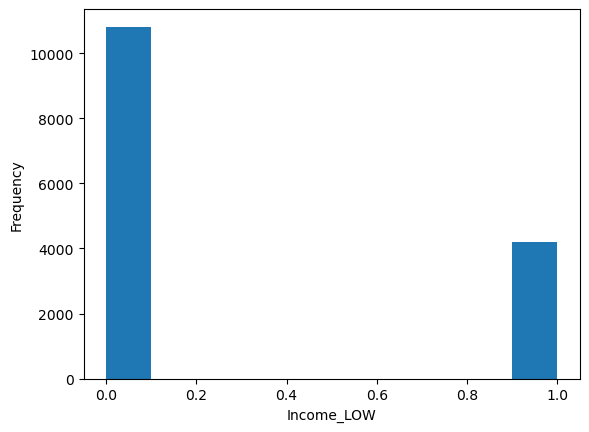

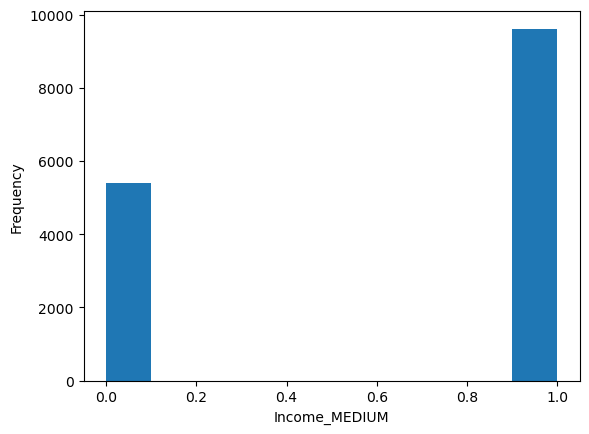

In [27]:
# We have Histogram,Density plot,pair plot,Q-Q plot etc to check the distribution of the data

for column in train.columns:
    train[column].plot(kind='hist')
    plt.xlabel(column)
    plt.show()

In [28]:
# Data in the columns are not normally distributed.
# we need to transform the data to normal distribution.
# For that we have log transformation,square root transformation,Reciprocal transformation are some of the techniques.

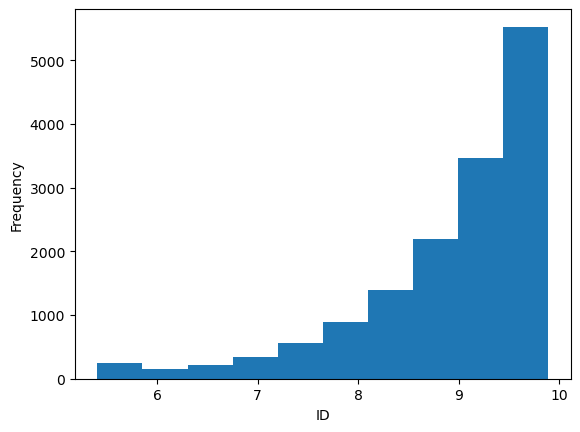

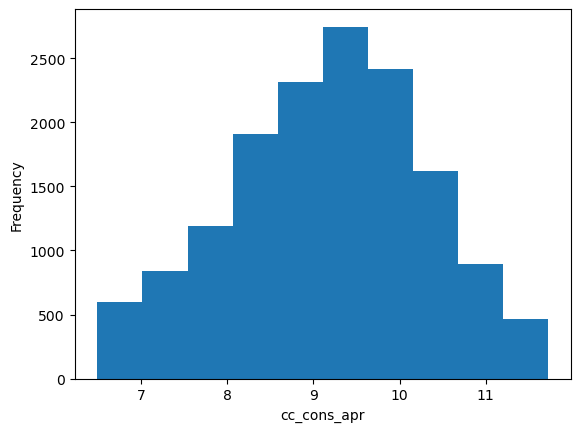

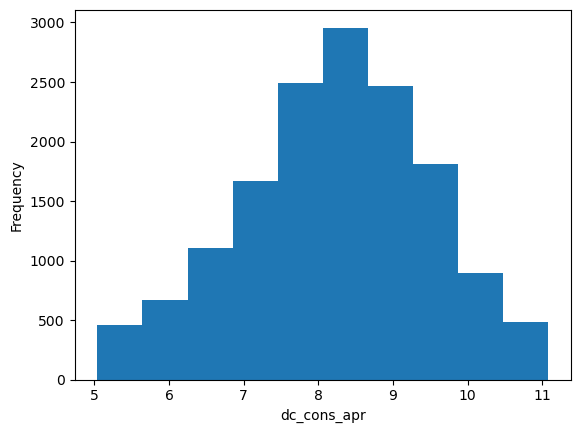

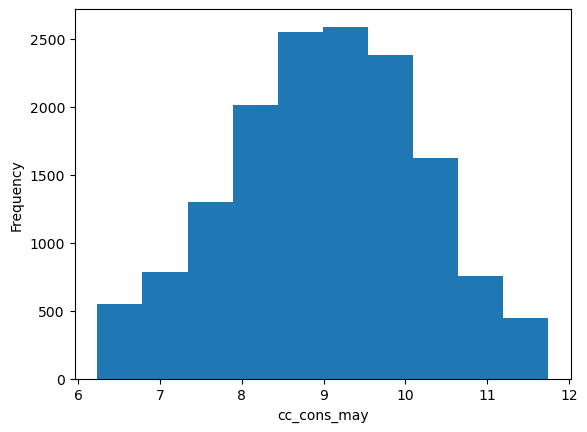

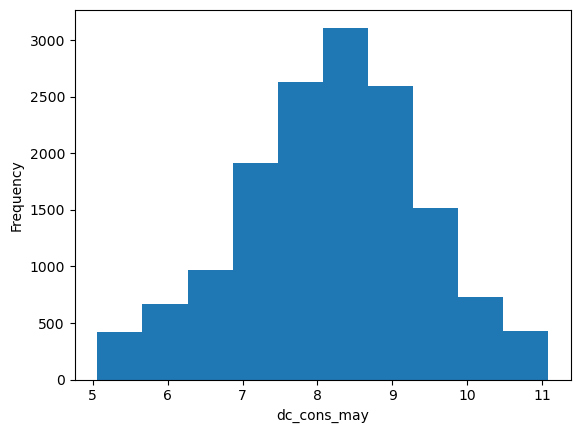

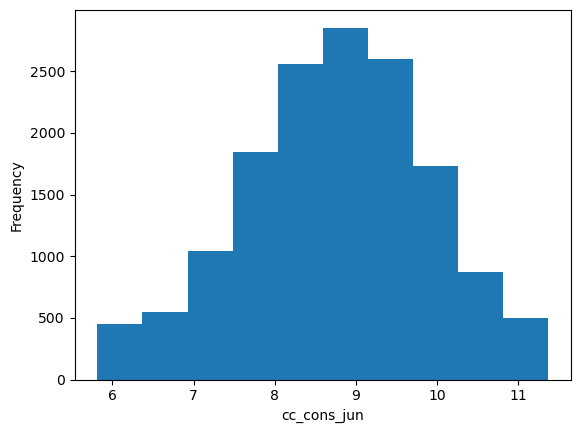

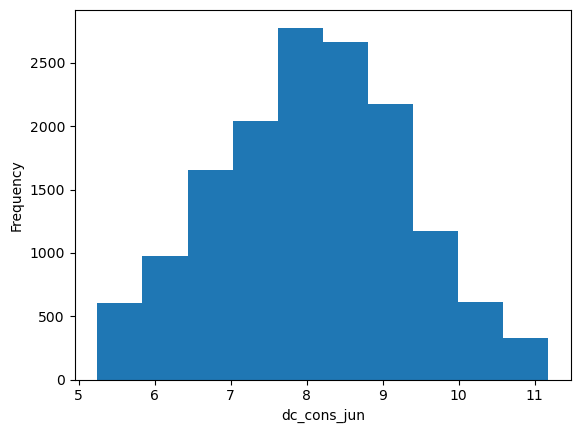

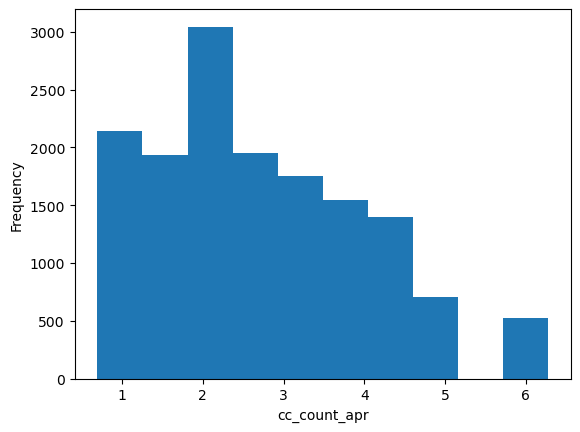

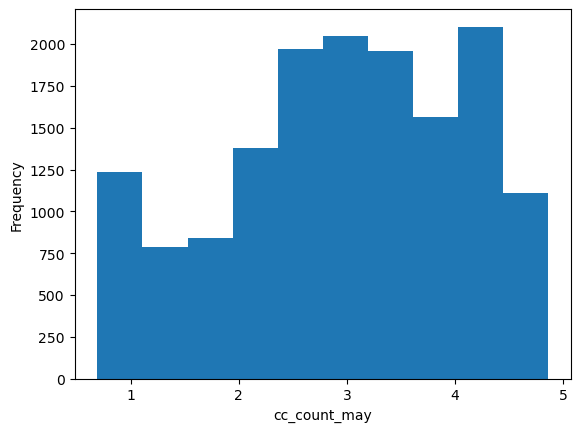

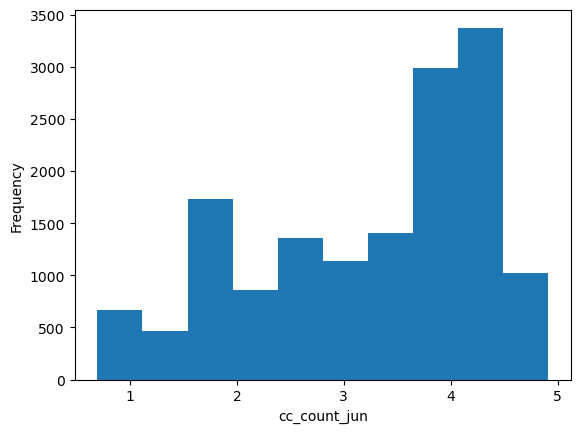

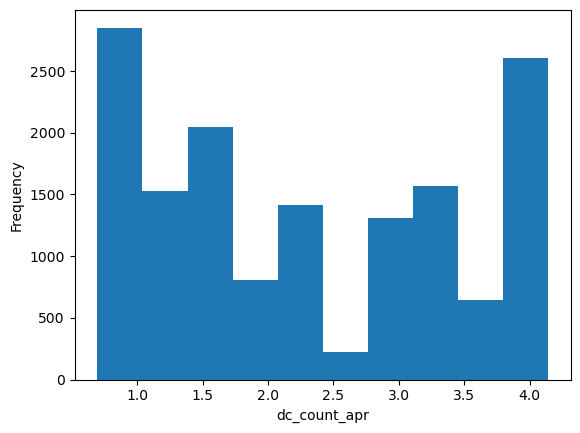

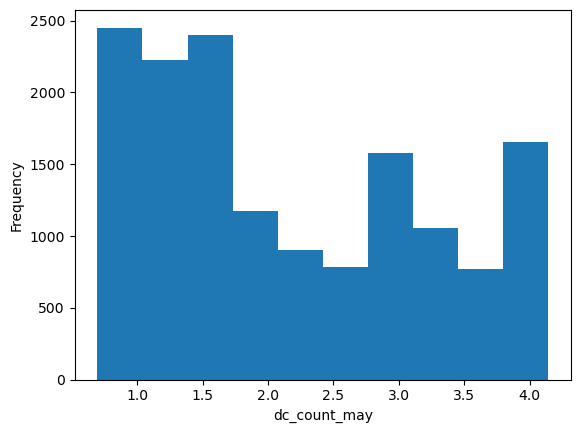

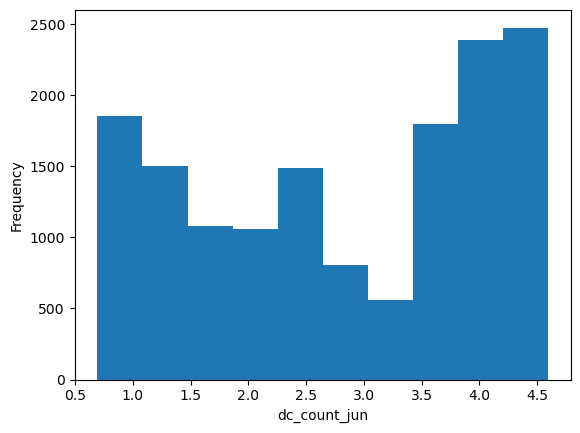

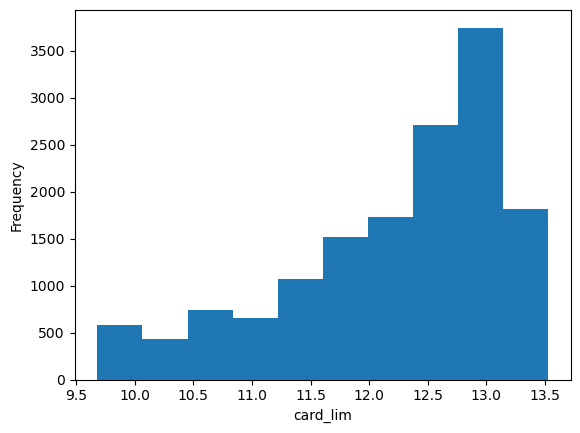

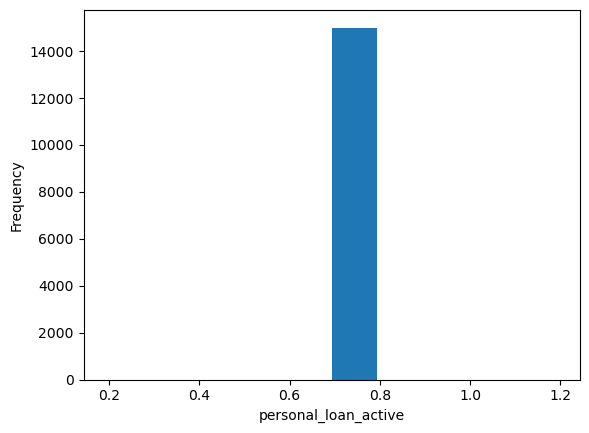

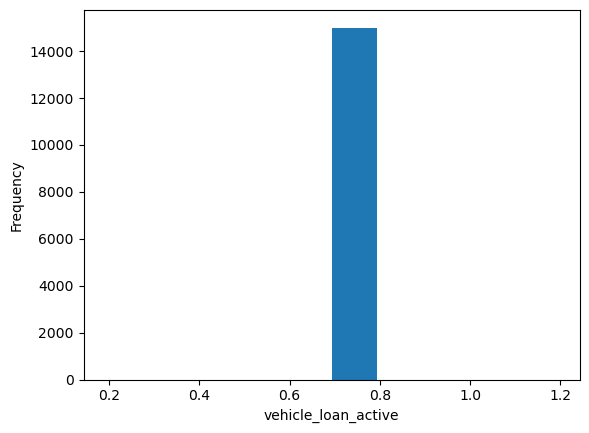

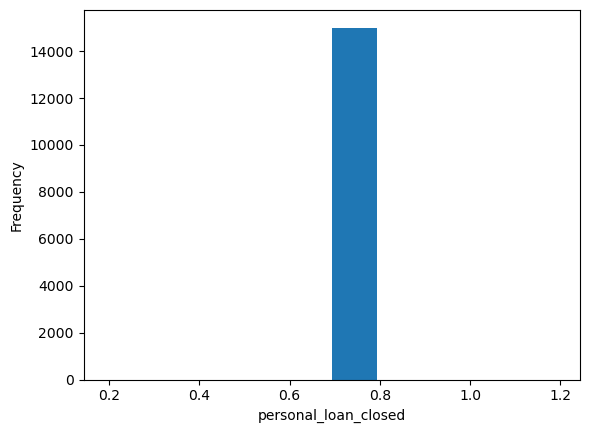

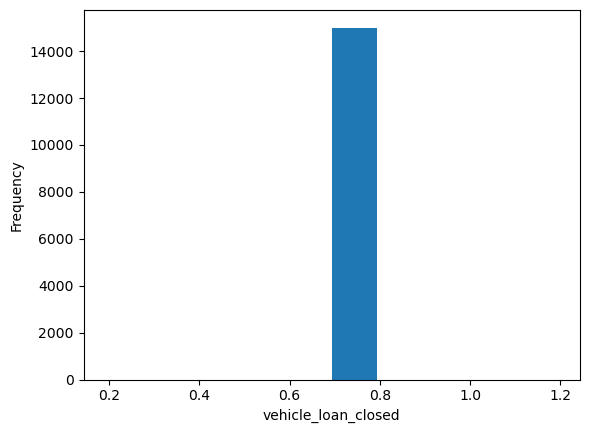

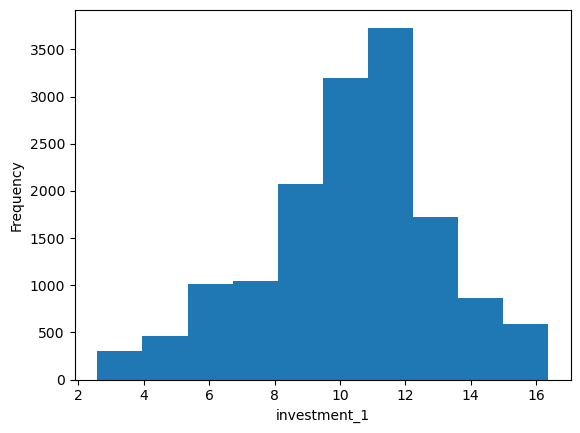

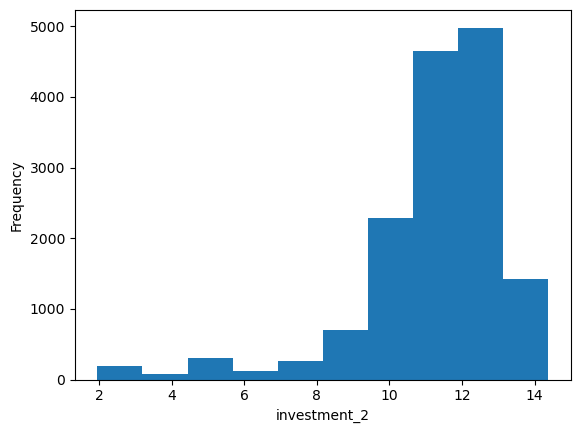

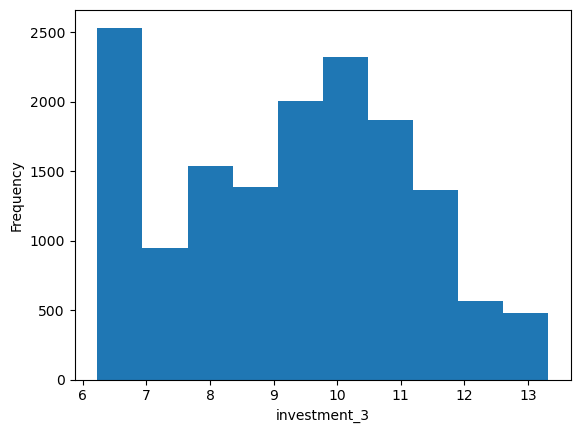

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


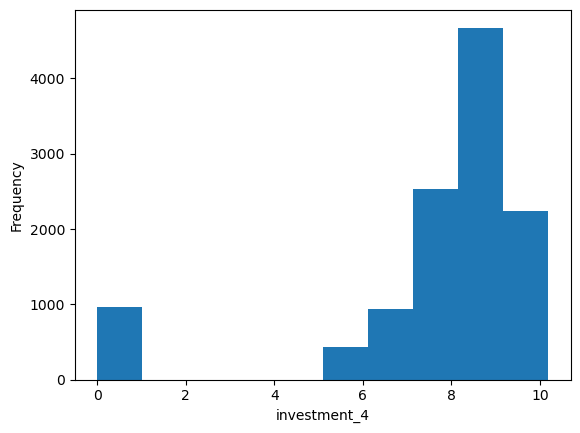

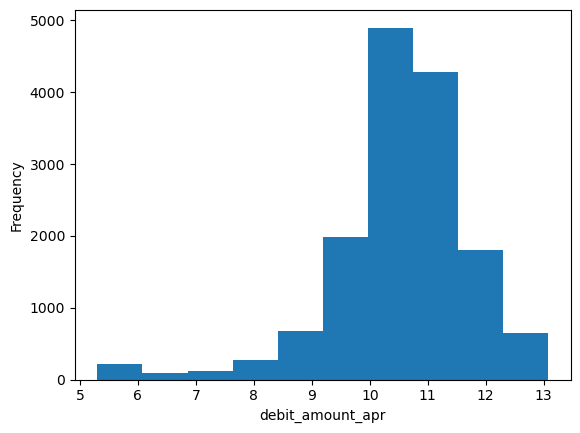

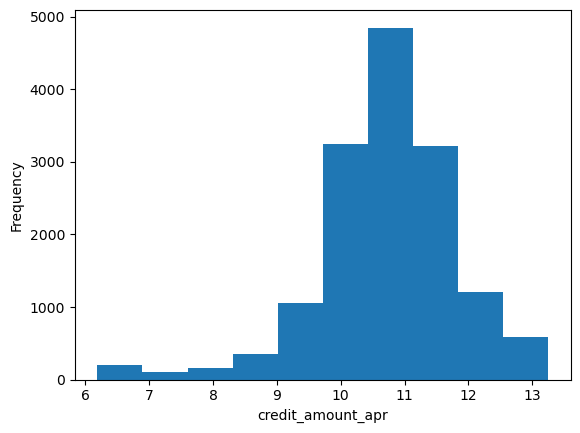

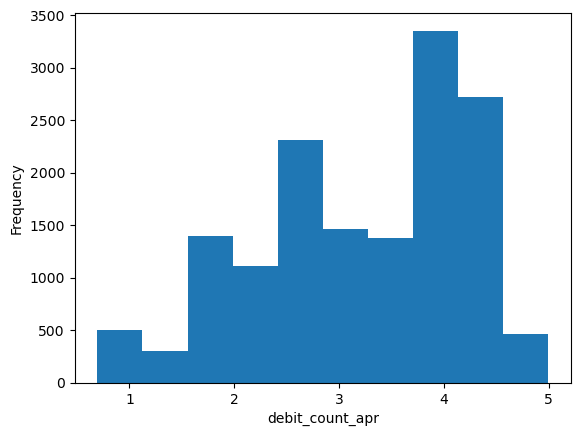

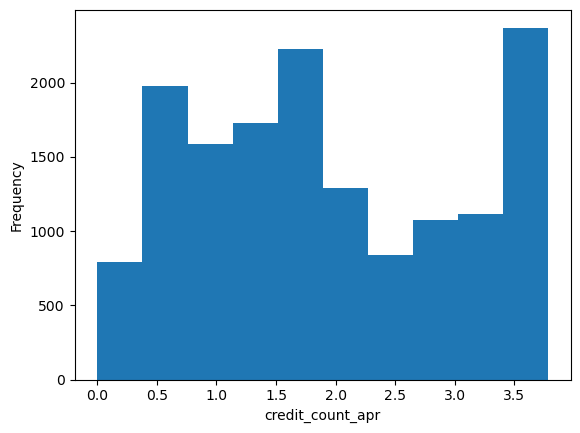

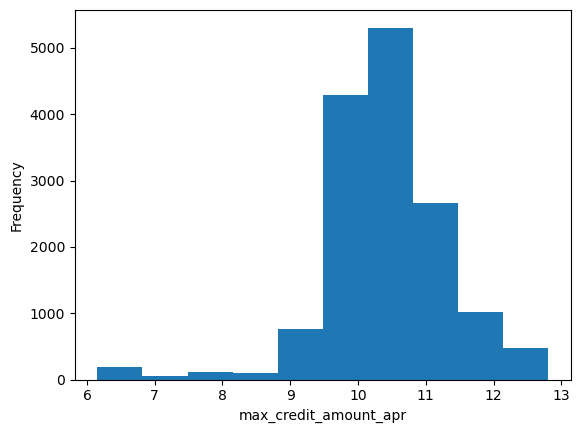

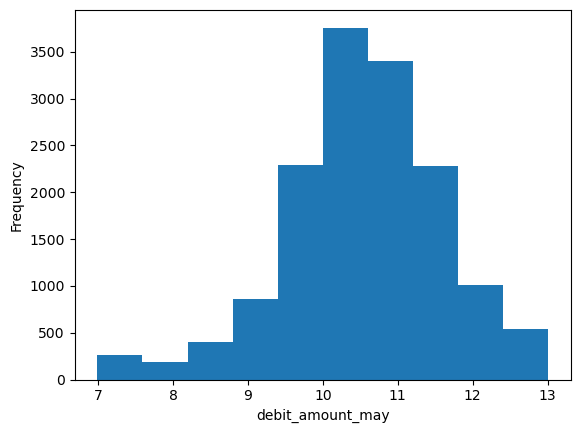

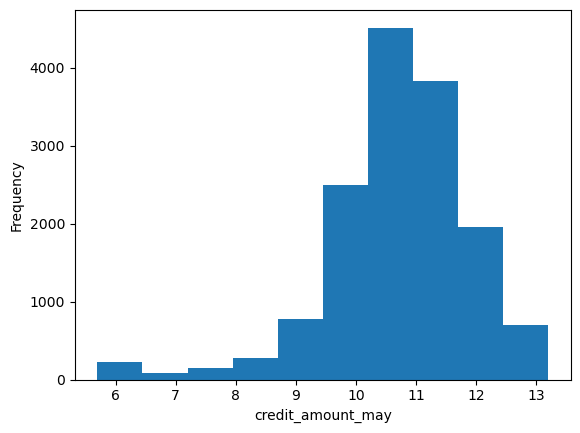

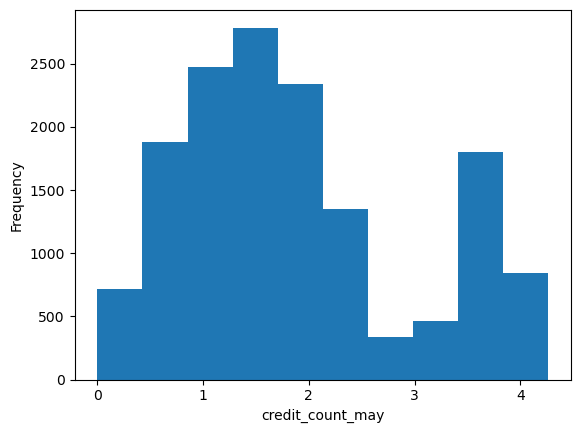

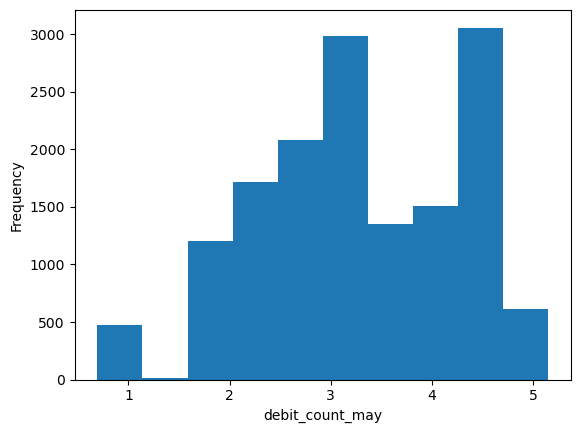

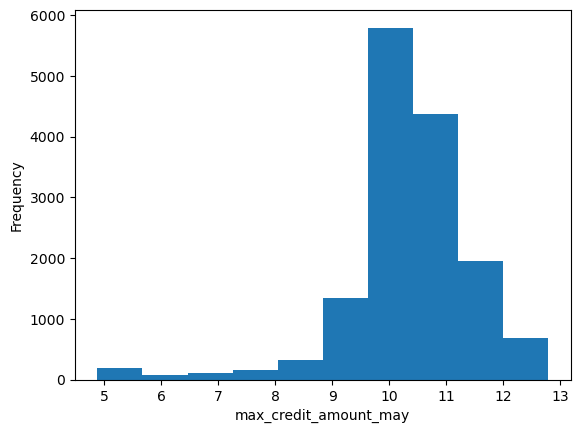

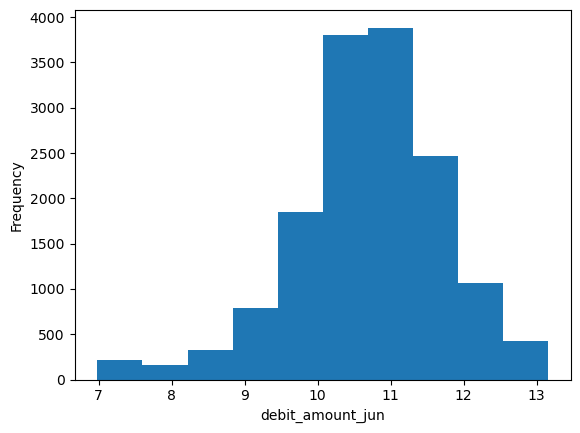

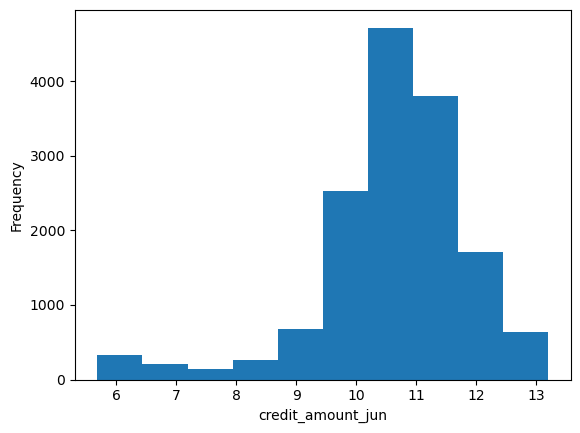

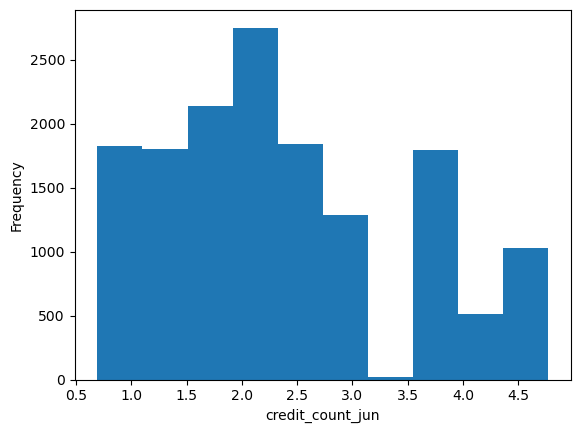

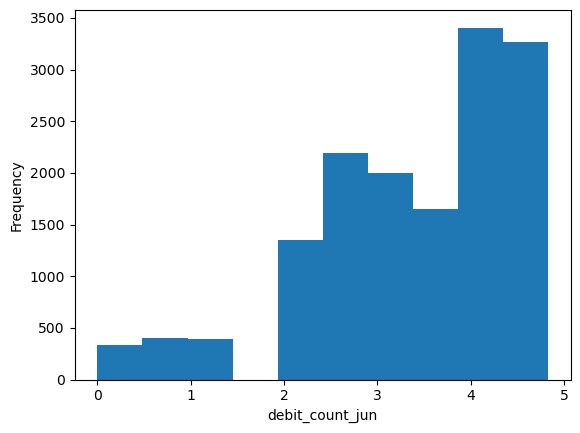

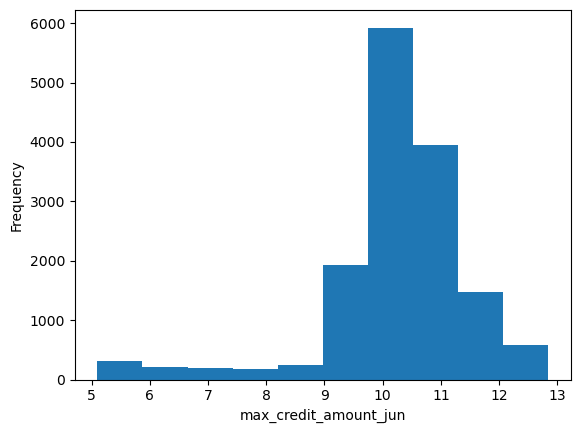

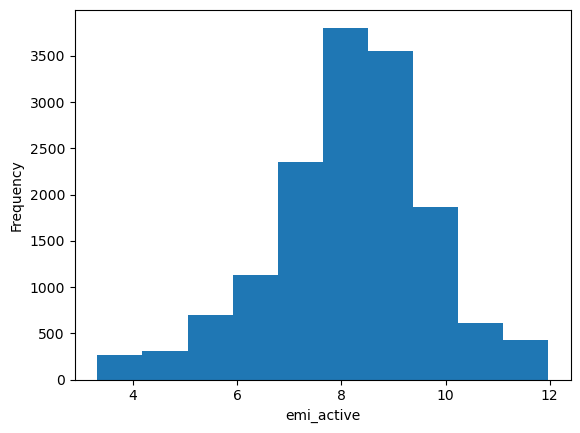

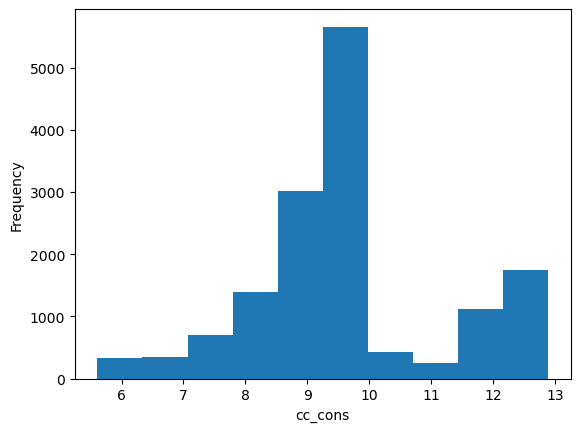

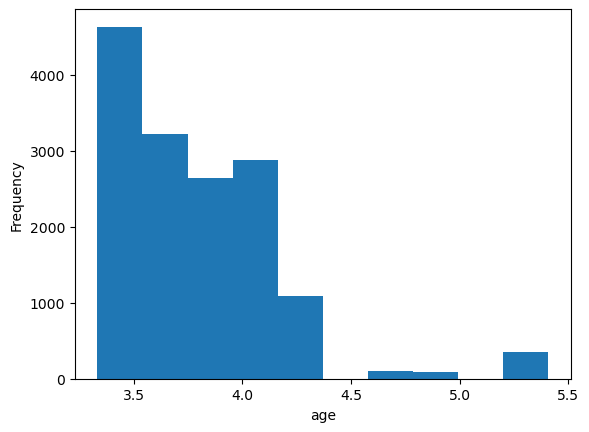

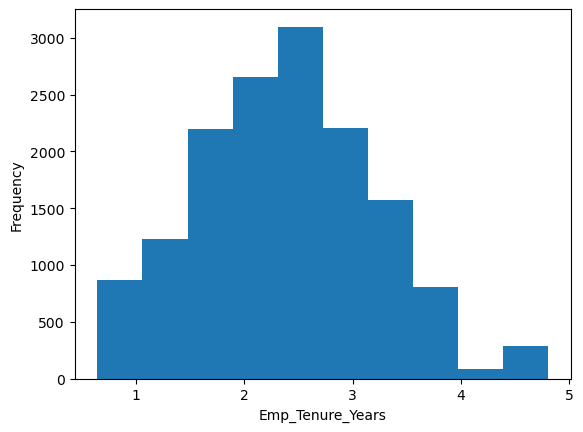

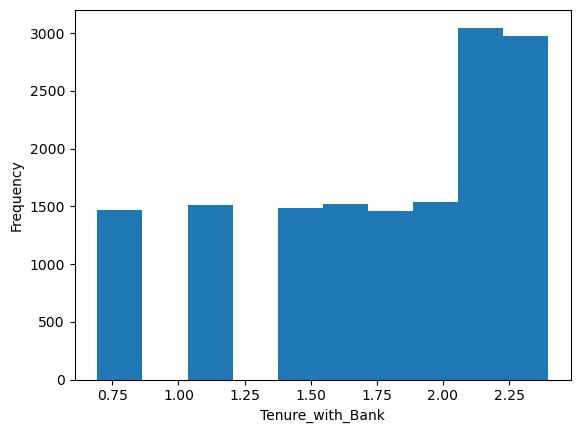

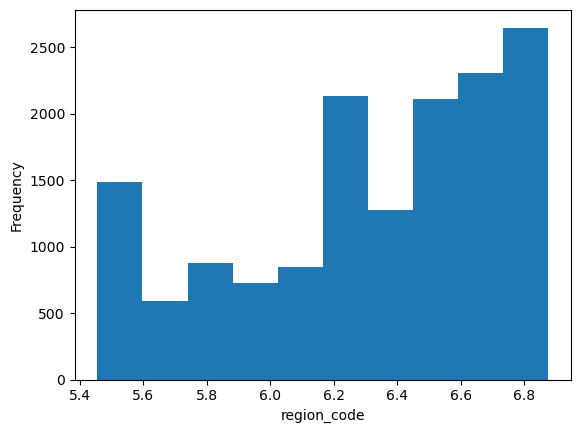

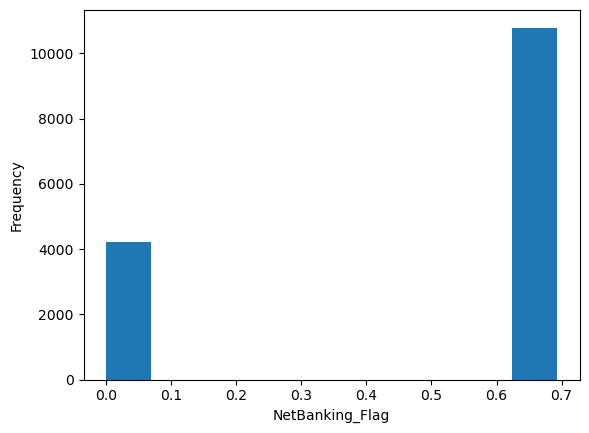

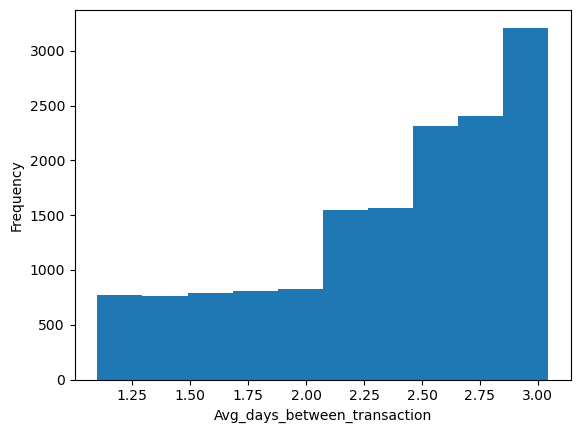

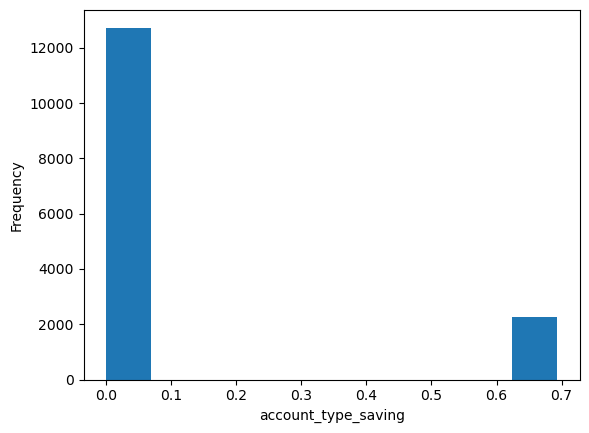

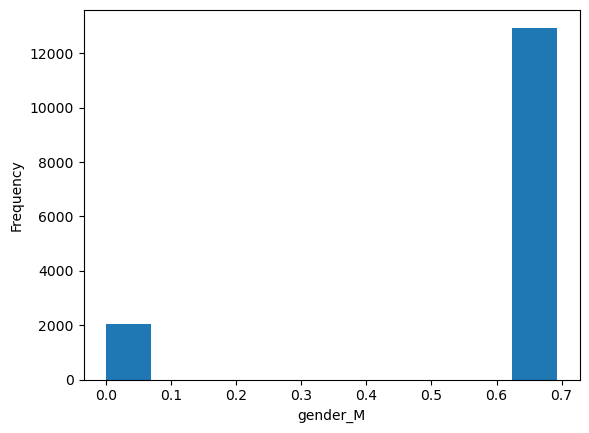

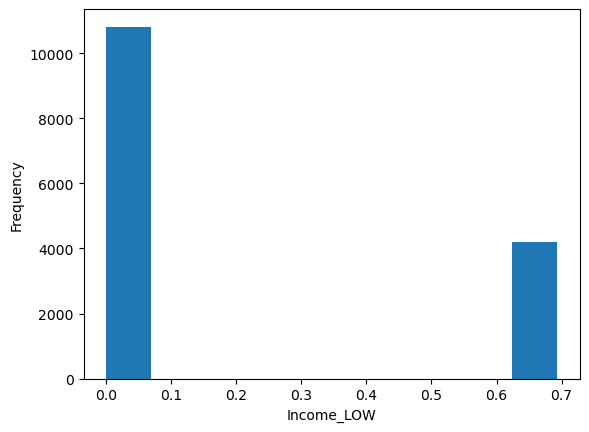

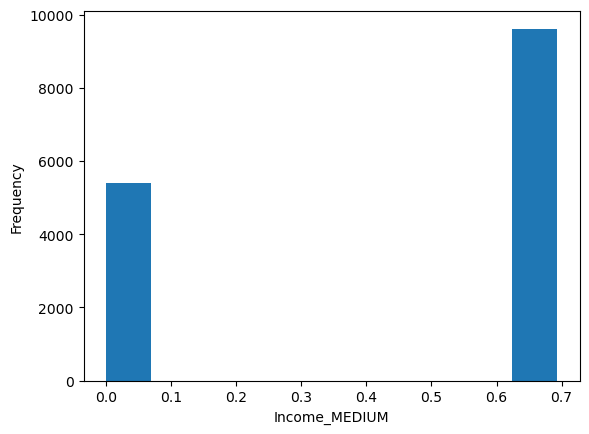

In [29]:
# First we will check the distribution by applying log transformation

for column in train.columns:
    np.log(train[column]+1).plot(kind='hist')
    plt.xlabel(column)
    plt.show()

In [30]:
train_data = train.copy()

In [31]:
train_data.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,17051.0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,30,7.0,5,956.0,1,20.0,0,1,0,1
1,11491.0,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,37,10.2,8,966.0,1,5.0,0,1,1,0


#### Feature Reduction

In [32]:
train_data.personal_loan_active.unique()

array([1], dtype=int64)

In [33]:
train_data.vehicle_loan_active.unique()

array([1], dtype=int64)

In [34]:
train_data.personal_loan_closed.unique()

array([1.])

In [35]:
train_data.vehicle_loan_closed.unique()

array([1], dtype=int64)

In [103]:
# from the above graphs we can ensure to drop columns - ID,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed

In [36]:
train_data = train_data.drop(columns = ['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'])

In [37]:
train_data.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction',
       'account_type_saving', 'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object')

In [38]:
# As we saw by log transformation data is normally distributed 

train_data['log_cc_cons'] = np.log(train_data.cc_cons)

In [39]:
train_data = train_data.drop(columns= 'cc_cons')

In [40]:
# After transforming some values are converted to infinite convert those values

np.isfinite(train_data.log_cc_cons).nunique()

1

In [41]:
train_data = train_data.replace((np.inf, -np.inf), 1).reset_index(drop=True)

In [42]:
train_data.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,log_cc_cons
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,...,7.0,5,956.0,1,20.0,0,1,0,1,9.505544
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,...,10.2,8,966.0,1,5.0,0,1,1,0,6.107023


In [43]:
train_data_final = train_data.drop(columns = 'log_cc_cons')

In [44]:
train_data_final.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,...,30,7.0,5,956.0,1,20.0,0,1,0,1
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,...,37,10.2,8,966.0,1,5.0,0,1,1,0


<Axes: >

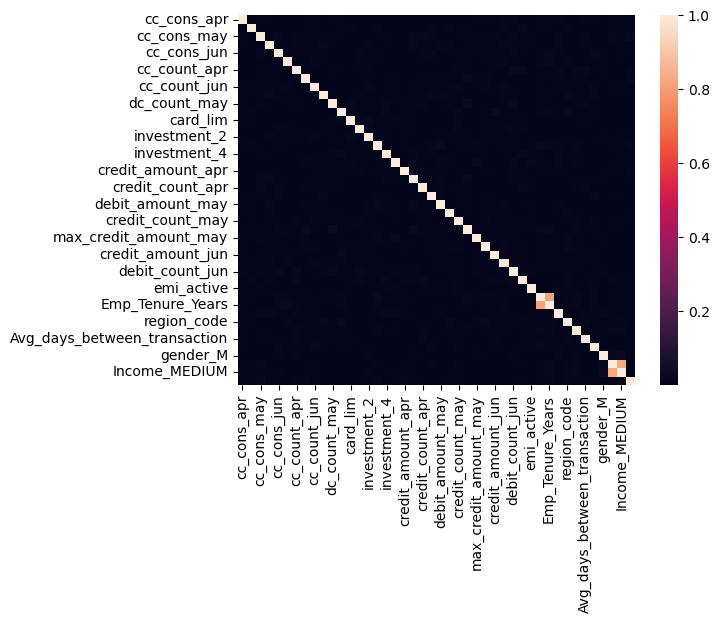

In [45]:
sns.heatmap(train_data.corr().abs())

In [46]:
train_data_final.corrwith(train_data['log_cc_cons']).abs().sort_values(ascending = False)

cc_cons_may                     0.022976
credit_amount_apr               0.018193
cc_count_may                    0.016129
cc_count_apr                    0.015185
Emp_Tenure_Years                0.012679
investment_3                    0.012082
Avg_days_between_transaction    0.010910
credit_amount_may               0.010738
max_credit_amount_jun           0.010194
age                             0.009931
debit_count_apr                 0.009919
region_code                     0.009230
dc_cons_apr                     0.009193
cc_cons_apr                     0.008731
Income_MEDIUM                   0.008083
card_lim                        0.006886
emi_active                      0.006661
investment_2                    0.006337
credit_count_jun                0.006203
Tenure_with_Bank                0.006054
debit_count_jun                 0.005912
dc_cons_jun                     0.005801
dc_cons_may                     0.005761
debit_amount_jun                0.005536
debit_amount_may

In [47]:
# By this correlation matrix i'll reduce maximum columns which helps for modelling 

In [48]:
# Importing statsmodels.formula.api for modelling

import statsmodels.formula.api as smf

#### Ordinary Least Squares (OLS) regression model 

In [49]:
smf.ols?

Signature: smf.ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
Docstring:
Create a Model from a formula and dataframe.

Parameters
----------
formula : str or generic Formula object
    The formula specifying the model.
data : array_like
    The data for the model. See Notes.
subset : array_like
    An array-like object of booleans, integers, or index values that
    indicate the subset of df to use in the model. Assumes df is a
    `pandas.DataFrame`.
drop_cols : array_like
    Columns to drop from the design matrix.  Cannot be used to
    drop terms involving categoricals.
*args
    Additional positional argument that are passed to the model.
**kwargs
    These are passed to the model with one exception. The
    ``eval_env`` keyword is passed to patsy. It can be either a
    :class:`patsy:patsy.EvalEnvironment` object or an integer
    indicating the depth of the namespace to use. For example, the
    default ``eval_env=0`` uses the calling namespace. If you wish
   

In [50]:
formula = 'log_cc_cons~cc_count_may+cc_cons_may+cc_count_apr'

In [51]:
model1 = smf.ols(formula,train_data).fit()

In [52]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.014
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00179
Time:                        10:59:46   Log-Likelihood:                -28133.
No. Observations:               15000   AIC:                         5.627e+04
Df Residuals:                   14996   BIC:                         5.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6115      0.022    444.346      0.000       9.569       9.654
cc_count_may     0.0008      0.000      1.944      0.052   -6.96e-06       0.002
cc_cons_may   1.745e-06   6.29e-07      2.775      0.006    5.12e-07    2.98e-06
cc_count_apr    -0.0002      0.000     -1.822      0.068      -0.001    1.83e-05
==============================================================================
Omnibus:                      180.934   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.253
Skew:                           0.272   Prob(JB):                     2.18e-41
Kurtosis:                       3.055   Cond. No.                     4.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.014
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00179
Time:                        10:59:49   Log-Likelihood:                -28133.
No. Observations:               15000   AIC:                         5.627e+04
Df Residuals:                   14996   BIC:                         5.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6115      0.022    444.346   

#### Evaluating training data

In [54]:
# Predicting the credit consumption values for the training data

p_value = model1.predict(train_data)
train_data['p_value'] = p_value

In [55]:
model_data = train_data[['log_cc_cons','p_value']]

In [56]:
model_data

,log_cc_cons,p_value
0,9.505544,9.617072
1,6.107023,9.670690
2,9.389992,9.694791
3,10.374397,9.639506
4,9.704671,9.630853
...,...,...
14995,8.357728,9.653126
14996,9.307376,9.667267
14997,12.887376,9.650522
14998,10.268582,9.792677


In [57]:
# Convert log values to the original format

model_data['cc_cons'] = np.exp(model_data['log_cc_cons'])
model_data['pred_value'] = np.exp(model_data['p_value'])

C:\Users\user\AppData\Local\Temp\ipykernel_2676\1638263341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['cc_cons'] = np.exp(model_data['log_cc_cons'])
C:\Users\user\AppData\Local\Temp\ipykernel_2676\1638263341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['pred_value'] = np.exp(model_data['p_value'])


In [58]:
model_data

,log_cc_cons,p_value,cc_cons,pred_value
0,9.505544,9.617072,13434.00,15019.004953
1,6.107023,9.670690,449.00,15846.284861
2,9.389992,9.694791,11968.00,16232.831043
3,10.374397,9.639506,32029.00,15359.754005
4,9.704671,9.630853,16394.00,15227.419445
...,...,...,...,...
14995,8.357728,9.653126,4263.00,15570.378603
14996,9.307376,9.667267,11019.00,15792.136370
14997,12.887376,9.650522,395290.55,15529.890369
14998,10.268582,9.792677,28813.00,17902.169490


### Model Evaluation Metric:
#### You should validate model using Root Mean Square Percentage Error (RMSPE) between the predicted credit card consumption and Actual Credit Consumption.

In [59]:
model_data['abs_error'] = np.abs(model_data['cc_cons']-model_data['pred_value'])

C:\Users\user\AppData\Local\Temp\ipykernel_2676\3055766257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['abs_error'] = np.abs(model_data['cc_cons']-model_data['pred_value'])


In [60]:
model_data['percent_error'] = model_data['abs_error']/model_data['cc_cons']

C:\Users\user\AppData\Local\Temp\ipykernel_2676\1577920653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['percent_error'] = model_data['abs_error']/model_data['cc_cons']


In [61]:
model_data['square_percent_error'] = model_data['percent_error']**2

C:\Users\user\AppData\Local\Temp\ipykernel_2676\1422565054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['square_percent_error'] = model_data['percent_error']**2


In [62]:
model_data

,log_cc_cons,p_value,cc_cons,pred_value,abs_error,percent_error,square_percent_error
0,9.505544,9.617072,13434.00,15019.004953,1585.004953,0.117985,0.013920
1,6.107023,9.670690,449.00,15846.284861,15397.284861,34.292394,1175.968279
2,9.389992,9.694791,11968.00,16232.831043,4264.831043,0.356353,0.126987
3,10.374397,9.639506,32029.00,15359.754005,16669.245995,0.520442,0.270860
4,9.704671,9.630853,16394.00,15227.419445,1166.580555,0.071159,0.005064
...,...,...,...,...,...,...,...
14995,8.357728,9.653126,4263.00,15570.378603,11307.378603,2.652446,7.035471
14996,9.307376,9.667267,11019.00,15792.136370,4773.136370,0.433173,0.187639
14997,12.887376,9.650522,395290.55,15529.890369,379760.659631,0.960713,0.922969
14998,10.268582,9.792677,28813.00,17902.169490,10910.830510,0.378677,0.143397


In [63]:
MSPE = model_data['square_percent_error'].mean()

In [64]:
MSPE

62.89764924838144

In [65]:
RMSPE = np.sqrt(MSPE)

In [66]:
RMSPE

7.930803821075228

#### Predicting values for customers where target variable having missing values

In [67]:
test_model_pred = model1.predict(test)

In [68]:
test = np.exp(test_model_pred).round(2)

In [69]:
test

15000    15207.18
15001    15092.65
15002    15356.10
15003    17214.69
15004    15135.54
           ...   
19995    15011.51
19996    16143.26
19997    16072.78
19998    15026.42
19999    14997.08
Length: 5000, dtype: float64